# Bike sharing case study
## Problem Statement
Understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Steps 
To understand the problem and propose a solution and sugestions to the bike sharing company post covid restrictions are removed we will be going through following steps on the given data.
1. Reading, Understandting, cleaning and visualizing the data
2. Preparing the data for modelling
    - Train - Test split
    - Rescaling
3. Training the model
    - RSE method
    - Manual elimenation of features
4. Resudaual analysis
5. Prediction and evaluation on the test set
6. Conclusion and suggestions

## Step 1: Reading, Understandting, cleaning and visualizing the data

### Reading

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [2]:
bs = pd.read_csv("day.csv")
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
bs.shape

(730, 16)

In [4]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


No null values need to clean up some of the coloumsn
- Drop instant coloumn we will not be needing index
- Convert dteday coloumn to time format
- All the min and max value look consistent with the coloum descriptions.

### Cleaning

In [6]:
bs = bs.drop('instant', axis=1)

In [7]:
bs['dteday']= pd.to_datetime(bs['dteday'])
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


In [8]:
bs['dteday'].duplicated().any()

False

- Lets replace categrical variables that have numbers with readable strings
    * season : season (1:spring, 2:summer, 3:fall, 4:winter)
    * weathersit :
        1: Clear
        2: Mist
        3: Light Snow
        4: Heavy Rain

In [9]:
bs['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bs['weathersit'].replace({1:"ClearFewClouds",2:"MistCloudy",3:"LightSnow",4:'HeavyRainIce'},inplace=True)
bs['mnth'] = bs.dteday.dt.month_name()
bs['weekday'] = bs.dteday.dt.day_name()
bs['yr'] = bs.dteday.dt.year
bs.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,January,0,Monday,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,2018,February,0,Thursday,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,2018,March,0,Thursday,1,ClearFewClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,2018,April,0,Sunday,1,ClearFewClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,2018,May,0,Tuesday,1,ClearFewClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-06-01,spring,2018,June,0,Friday,1,ClearFewClouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-07-01,spring,2018,July,0,Sunday,1,MistCloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-08-01,spring,2018,August,0,Wednesday,0,MistCloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-09-01,spring,2018,September,0,Saturday,0,ClearFewClouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-10-01,spring,2018,October,0,Monday,1,ClearFewClouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [10]:
for c in bs.columns:
    print (f"---- {c} ---")
    print(bs[c].value_counts())

---- dteday ---
2018-01-01    1
2019-04-25    1
2019-04-27    1
2019-04-28    1
2019-04-29    1
             ..
2018-03-09    1
2018-04-09    1
2018-05-09    1
2018-06-09    1
2019-12-31    1
Name: dteday, Length: 730, dtype: int64
---- season ---
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
---- yr ---
2018    365
2019    365
Name: yr, dtype: int64
---- mnth ---
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64
---- holiday ---
0    709
1     21
Name: holiday, dtype: int64
---- weekday ---
Monday       105
Tuesday      105
Thursday     104
Sunday       104
Friday       104
Wednesday    104
Saturday     104
Name: weekday, dtype: int64
---- workingday ---
1    499
0    231
Name: workingday, dtype: int64
---- weathersit ---
ClearFewClouds    463
MistCloudy        246
LightSnow          

For sanity check lets check if `casual` + `registered` = `cnt`

In [11]:
bs.apply(lambda x: (x['casual'] + x['registered'] == x['cnt']), axis=1).value_counts()

True    730
dtype: int64

Looks like the rows coustomer count is valid, Total count is equal to `casual` riders plus `registered`

### Visualizing

Lets start visalizing data, One of the first thing we want to visualize is data spread, how much of outliers are present. This gives us idea on how predictable or model would be.
* Models are better when there are few outliners. 
* We also want to find if there is any liner relation between `cnt` and other variables.

In the data given, `casual` and `registered` will add to `cnt`, When building model we need to figure out if we need all 3 of them.


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.plotting.backend = "plotly"
import seaborn as sns

Lets plot the total usage day by day and also lets plot registerd and casual users also

In [13]:
bs = bs.sort_values(['dteday','mnth','yr'])

In [14]:
bs.head(20)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,January,0,Monday,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
31,2018-01-02,spring,2018,January,0,Tuesday,1,MistCloudy,7.879134,11.72650,82.9565,3.565271,47,1313,1360
59,2018-01-03,spring,2018,January,0,Wednesday,1,ClearFewClouds,10.933347,13.19395,53.5000,14.500475,137,1714,1851
90,2018-01-04,summer,2018,January,0,Thursday,1,MistCloudy,12.300000,14.17270,68.6250,17.333436,307,1920,2227
120,2018-01-05,summer,2018,January,0,Friday,0,MistCloudy,18.518347,22.41020,76.2083,7.125718,1138,2213,3351
151,2018-01-06,summer,2018,January,0,Saturday,1,MistCloudy,31.330847,36.04835,67.7083,13.875164,513,3461,3974
181,2018-01-07,fall,2018,January,0,Sunday,1,ClearFewClouds,29.622500,32.60810,39.6250,6.874736,1246,4116,5362
212,2018-01-08,fall,2018,January,0,Monday,1,ClearFewClouds,31.638347,35.16460,55.0833,10.500039,729,3537,4266
243,2018-01-09,fall,2018,January,0,Tuesday,1,ClearFewClouds,26.855000,30.74605,63.9167,9.500332,783,4332,5115
273,2018-01-10,winter,2018,January,0,Wednesday,0,MistCloudy,16.810000,20.64315,75.3750,19.583832,480,1949,2429


<function matplotlib.pyplot.show(close=None, block=None)>

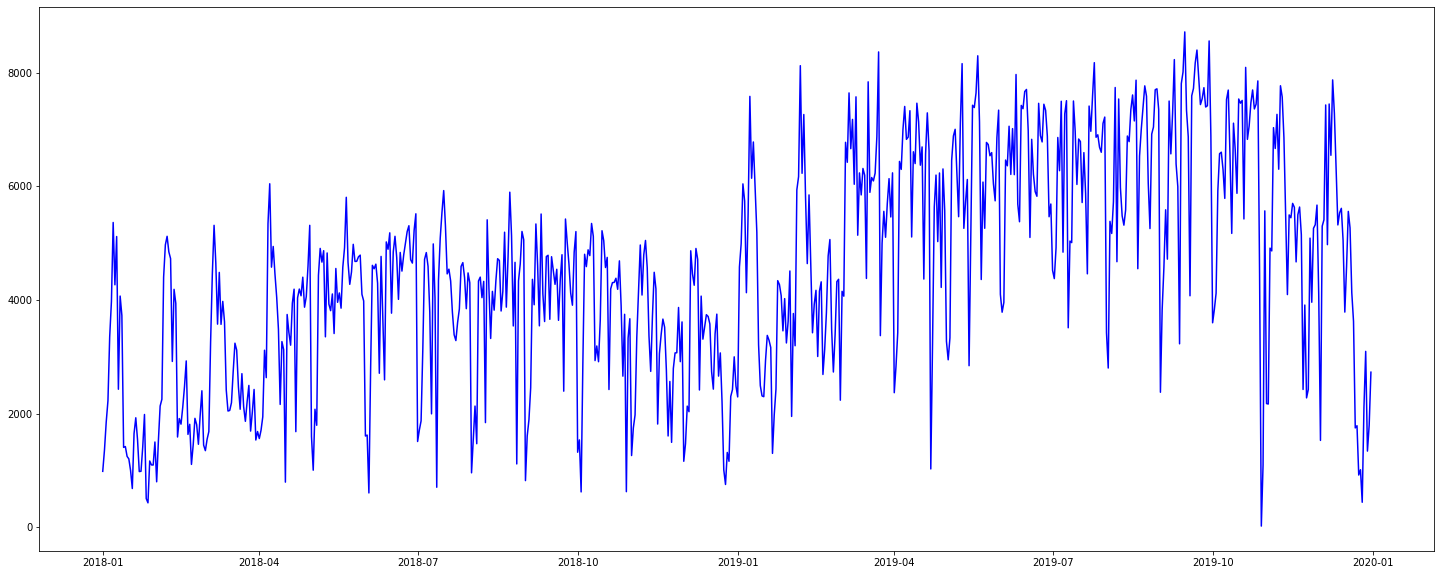

In [15]:
fig = plt.figure(figsize=(25,10))
plt.plot(bs.dteday,bs.cnt, color="blue")
plt.savefig('img/coutomer_demand.png')
plt.show

<div class="alert alert-block alert-info">
<b>Observation:</b> Looks like bike sharing has a uptick in coustomers in 2019. This might be due to coustomers making new year resolutions to stay healthy or save environment
</div>

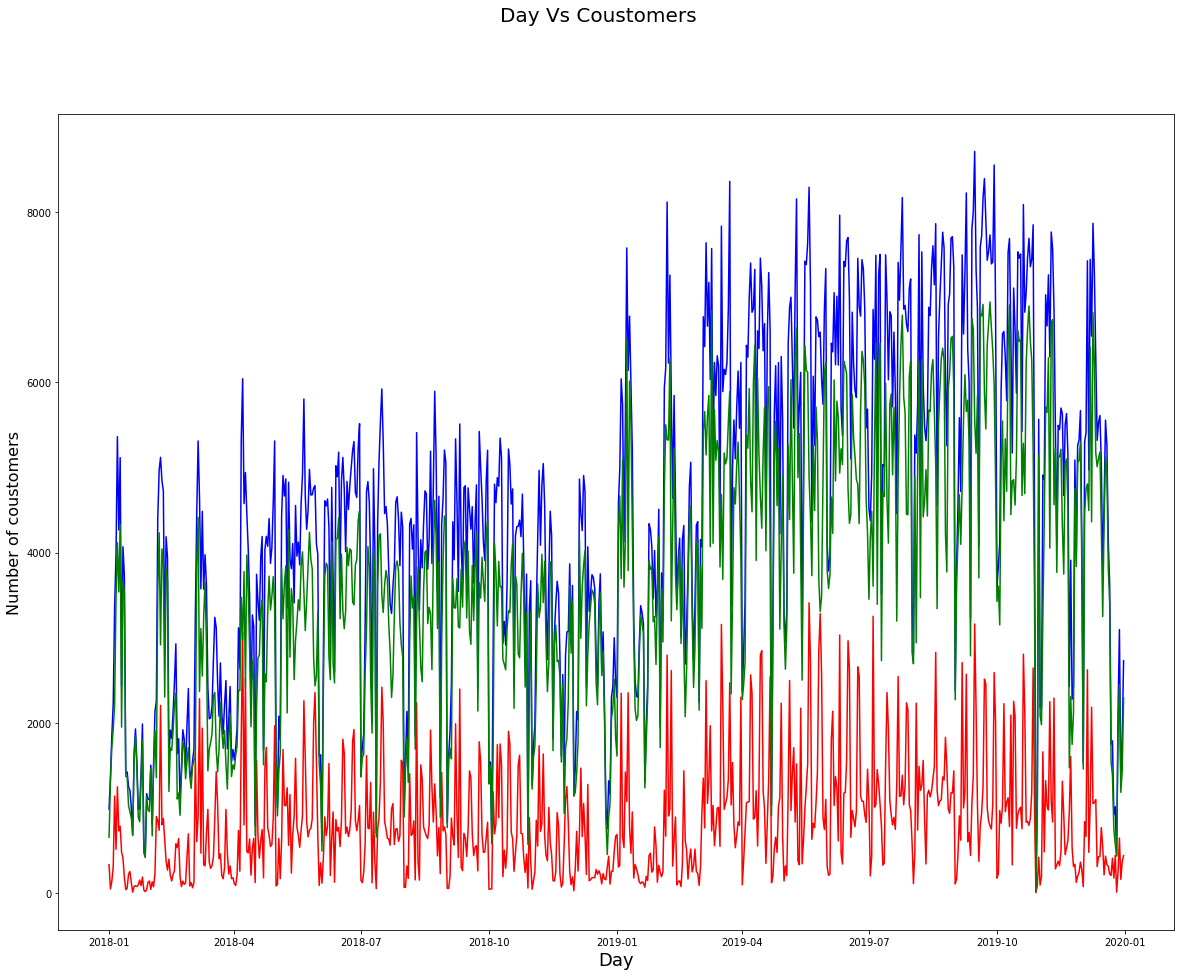

In [16]:
fig = plt.figure(figsize=(20,15))
plt.plot(bs.dteday,bs.cnt, color="blue")
plt.plot(bs.dteday,bs.casual, color="red")
plt.plot(bs.dteday,bs.registered, color="green")
fig.suptitle('Day Vs Coustomers', fontsize=20)              # Plot heading 
plt.xlabel('Day', fontsize=18)                               # X-label
plt.ylabel('Number of coustomers', fontsize=16)
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> Uptick in 2019 is mostly due to increased in registerd coustomers. Marketting team might want to focus on New year promotions.
</div>

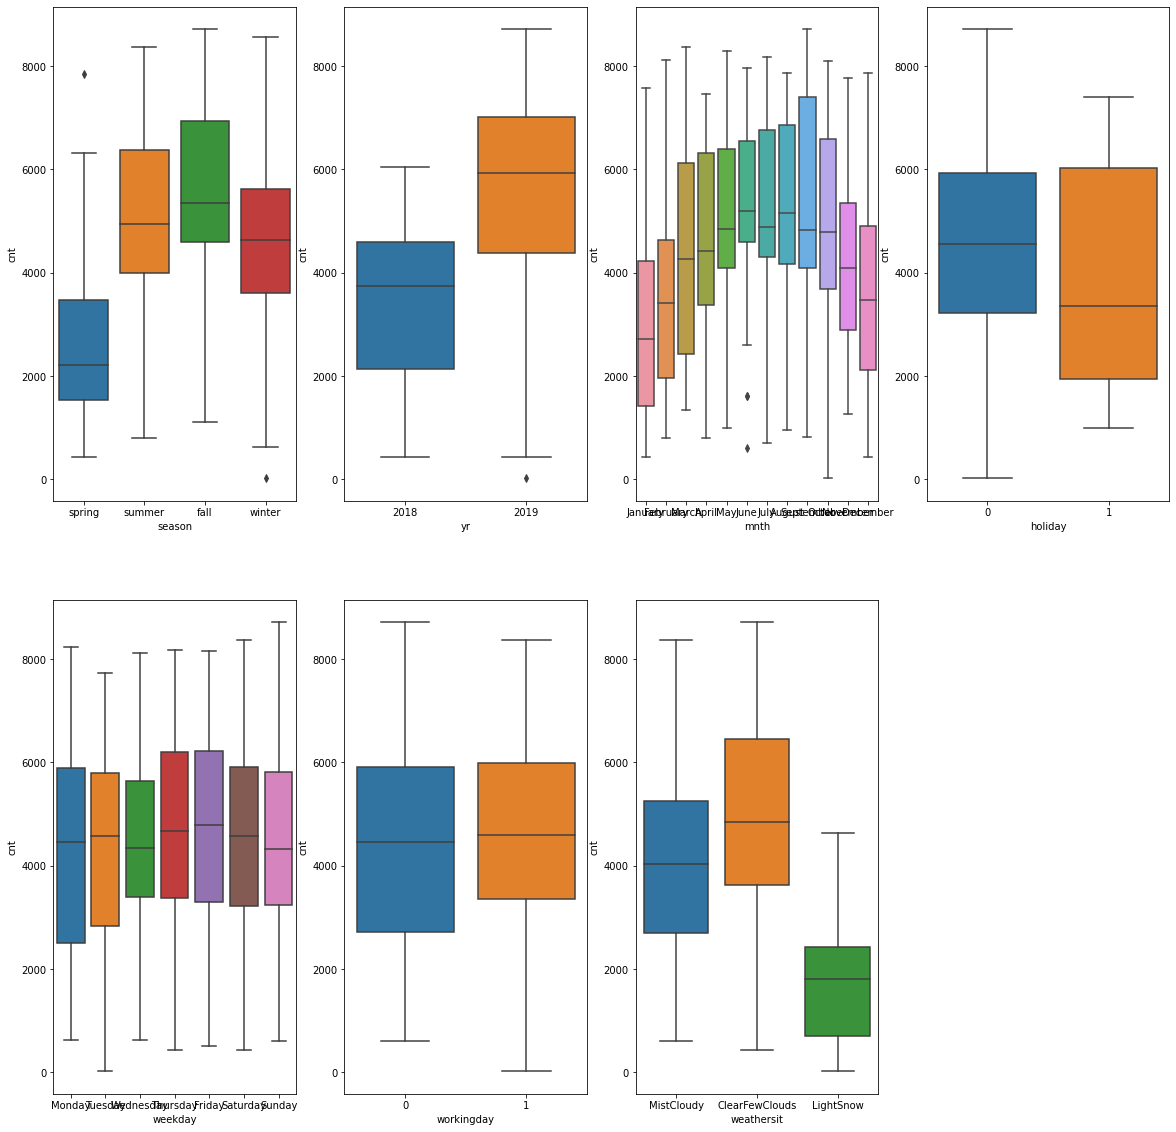

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y='cnt', data=bs)

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y='cnt', data=bs)

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y='cnt', data=bs)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y='cnt', data=bs)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y='cnt', data=bs)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y='cnt', data=bs)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y='cnt', data=bs)

plt.savefig('img/continous_var_relation.png')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 
    There are few observations from above graphs
    
    1. Season 1, spring has negative effect on bike sharing usage.
    2. Bike sharing has drastic uptic in 2019.
    3. Weekday and working day also has minimul effect.
    4. Snow has very drastic effect on bike sharing usage.
</div>

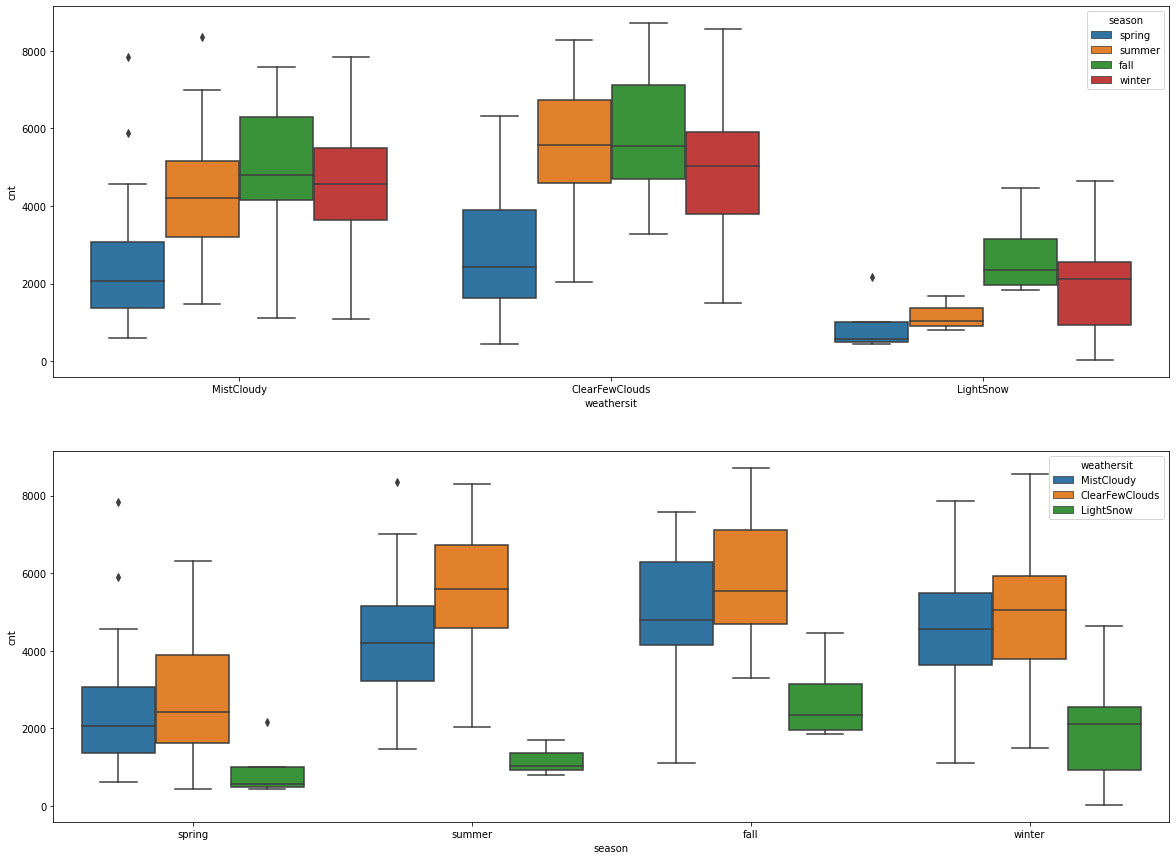

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x = 'weathersit', y='cnt', data=bs, hue='season')

plt.subplot(2,1,2)
sns.boxplot(x = 'season', y='cnt', data=bs, hue='weathersit')

plt.savefig('img/Season_weather.png')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 
    There are two major observations from above graphs
    
    1. Season 1, spring has negative effect on bike sharing usage, irrespective of the weather.
    2. Snow has a negative effect on bike sharing irrespective of the season.

    Conclusion here irespective of seasons and weather, Snow and Spring has negative effect.
</div>

To get little deeper lets try to understand registered vs casual in season of spring. and also. when there is Light snow

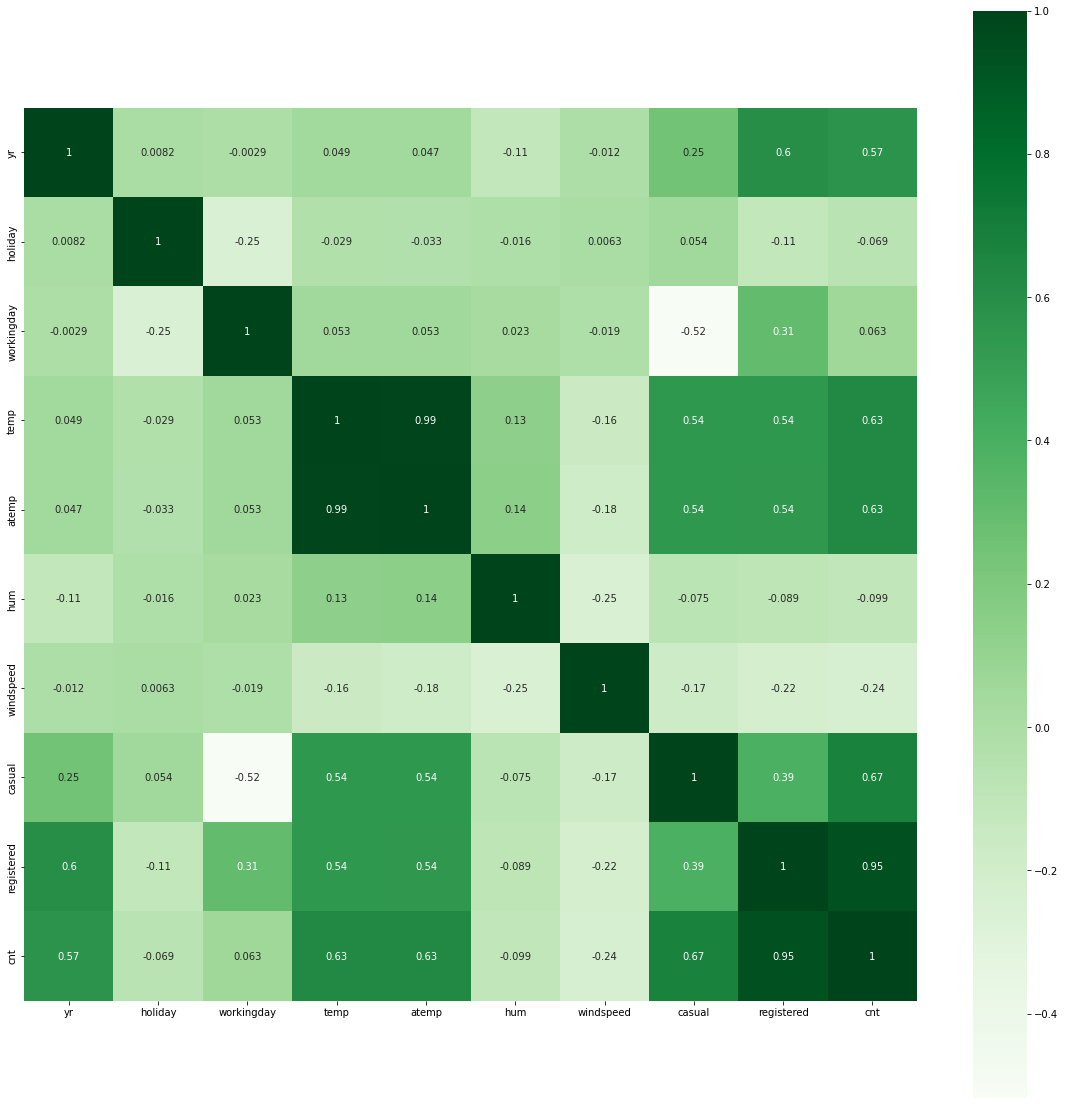

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(bs.corr(), annot = True, cmap="Greens", square= True)
plt.savefig('img/all_coustomers_corr.png')
plt.show()

<Figure size 1440x1440 with 0 Axes>

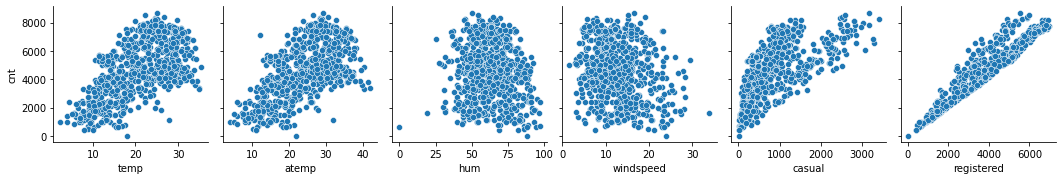

In [20]:
plt.figure(figsize=(20,20))
sns.pairplot(bs, y_vars='cnt', x_vars=['temp','atemp','hum','windspeed','casual','registered'])
plt.savefig('img/all_coustomers_pair_plot.png')
plt.show()

In [21]:
bs.corr()['cnt'].abs().sort_values(ascending=False)

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
yr            0.569728
windspeed     0.235132
hum           0.098543
holiday       0.068764
workingday    0.062542
Name: cnt, dtype: float64

<div class="alert alert-block alert-info">
<b>Observation:</b> 

    `cnt` is highly correlated to `registered` and `casual` which makes sense, `cnt` = `registered` + `casual`
    `atemp` and `temp` are highly dependent on the bike sharing. Understandable, based on temperature customers are deciding weather to use bike sharing or not.
    Also there is some linear relation between `atemp`, `temp` and `cnt` so linear regression can be used here
    `season` and `weathersit` are also corellated to `cnt` as we saw `spring` and `snow` have high effect on coustomer use of bike sharing.
    
    
    temp and atemp are highly corelated we might not need both the variables.
    temp and atemp are also 30% corelated with season
    
    
    We can also drop `temp` and keep `atemp`
    We can drop `registered` and `casual` also
</div>

In [22]:
bs_registered = bs.drop(['dteday','temp','cnt','casual'], axis=1)
bs_casual = bs.drop(['dteday','temp','registered','cnt'], axis=1)
bs = bs.drop(['dteday','temp','registered','casual'], axis=1)
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Monday,0,MistCloudy,18.18125,80.5833,10.749882,985
31,spring,2018,January,0,Tuesday,1,MistCloudy,11.72650,82.9565,3.565271,1360
59,spring,2018,January,0,Wednesday,1,ClearFewClouds,13.19395,53.5000,14.500475,1851
90,summer,2018,January,0,Thursday,1,MistCloudy,14.17270,68.6250,17.333436,2227
120,summer,2018,January,0,Friday,0,MistCloudy,22.41020,76.2083,7.125718,3351


In [23]:
bs = pd.get_dummies(bs, columns=['season', 'weathersit', 'yr', 'mnth', 'weekday'], drop_first=True)
bs.head()

,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,0,1,11.72650,82.9565,3.565271,1360,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
59,0,1,13.19395,53.5000,14.500475,1851,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90,0,1,14.17270,68.6250,17.333436,2227,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
120,0,0,22.41020,76.2083,7.125718,3351,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


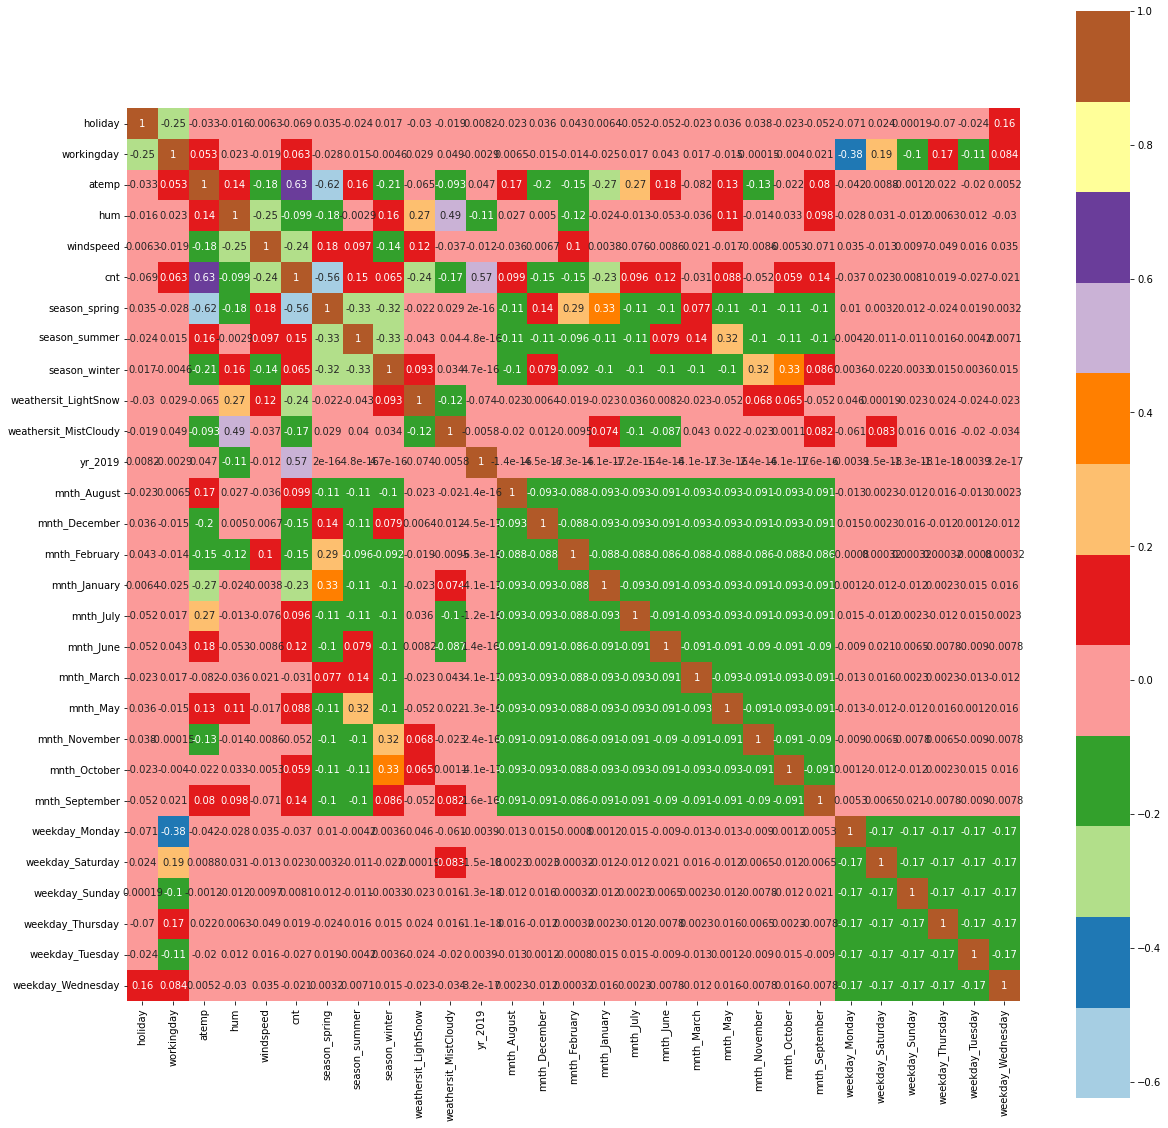

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(bs.corr(), annot = True, cmap="Paired", square= True)
plt.show()

In [25]:
import dataframe_image as dfi
correlation_data=pd.DataFrame(bs.corr()['cnt'].abs().sort_values(ascending=False)).rename_axis("Features")
dfi.export(correlation_data,"img/correlation_data.png")
display(correlation_data)

[0413/020625.907794:INFO:headless_shell.cc(659)] Written to file /var/folders/7v/k8c1f2wn5nv_9c15ft5q88gm0000gp/T/tmp2siar_2r/temp.png.
[0413/020627.515344:INFO:headless_shell.cc(659)] Written to file /var/folders/7v/k8c1f2wn5nv_9c15ft5q88gm0000gp/T/tmpr4owwdwz/temp.png.


,cnt
Features,
cnt,1.000000
atemp,0.630685
yr_2019,0.569728
season_spring,0.561702
weathersit_LightSnow,0.240602
windspeed,0.235132
mnth_January,0.234235
weathersit_MistCloudy,0.170686
mnth_December,0.154565


In [26]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                730 non-null    int64  
 1   workingday             730 non-null    int64  
 2   atemp                  730 non-null    float64
 3   hum                    730 non-null    float64
 4   windspeed              730 non-null    float64
 5   cnt                    730 non-null    int64  
 6   season_spring          730 non-null    uint8  
 7   season_summer          730 non-null    uint8  
 8   season_winter          730 non-null    uint8  
 9   weathersit_LightSnow   730 non-null    uint8  
 10  weathersit_MistCloudy  730 non-null    uint8  
 11  yr_2019                730 non-null    uint8  
 12  mnth_August            730 non-null    uint8  
 13  mnth_December          730 non-null    uint8  
 14  mnth_February          730 non-null    uint8  
 15  mnth_J

Here we are considering `cnt` as independent variable lets try plotting scatter plot for `cnt` only for better view of the data spread

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

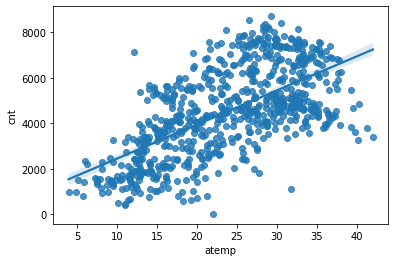

In [27]:
sns.regplot(x='atemp', y='cnt', data=bs)

### More analysis
Before going to Conclusions we need to analyze regesitered and casusal coustomers speratly.
Here we will quickly review them here

In [28]:
bs_registered = pd.get_dummies(bs_registered, columns=['season', 'weathersit', 'yr', 'mnth', 'weekday'], drop_first=True)
bs_registered.head()

,holiday,workingday,atemp,hum,windspeed,registered,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,18.18125,80.5833,10.749882,654,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,0,1,11.72650,82.9565,3.565271,1313,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
59,0,1,13.19395,53.5000,14.500475,1714,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90,0,1,14.17270,68.6250,17.333436,1920,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
120,0,0,22.41020,76.2083,7.125718,2213,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
bs_casual = pd.get_dummies(bs_casual, columns=['season', 'weathersit', 'yr', 'mnth', 'weekday'], drop_first=True)
bs_casual.head()

,holiday,workingday,atemp,hum,windspeed,casual,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,18.18125,80.5833,10.749882,331,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,0,1,11.72650,82.9565,3.565271,47,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
59,0,1,13.19395,53.5000,14.500475,137,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90,0,1,14.17270,68.6250,17.333436,307,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
120,0,0,22.41020,76.2083,7.125718,1138,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


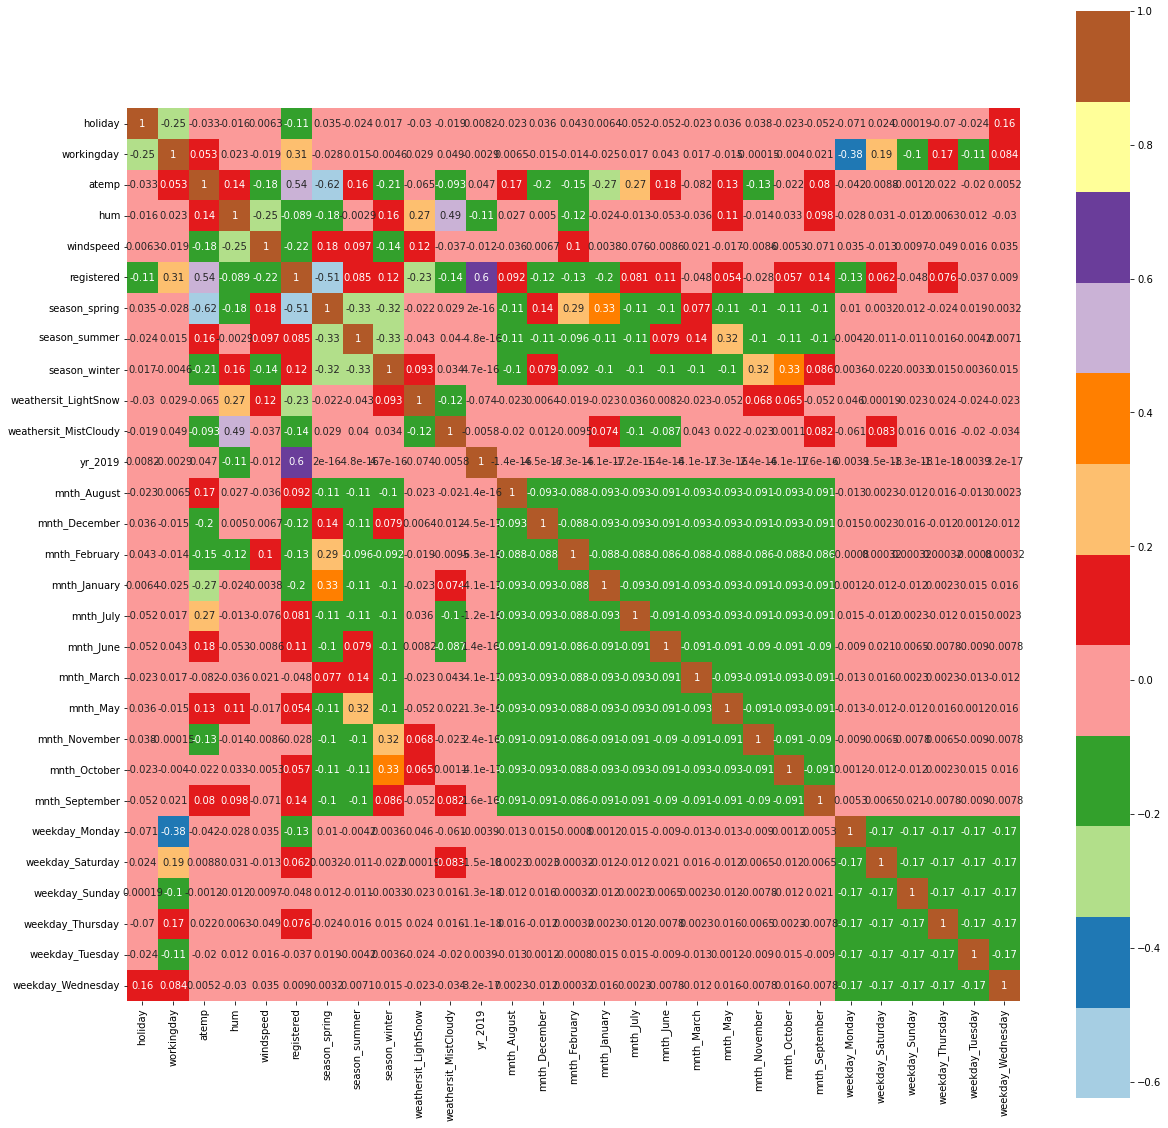

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(bs_registered.corr(), annot = True, cmap="Paired", square= True)
plt.show()

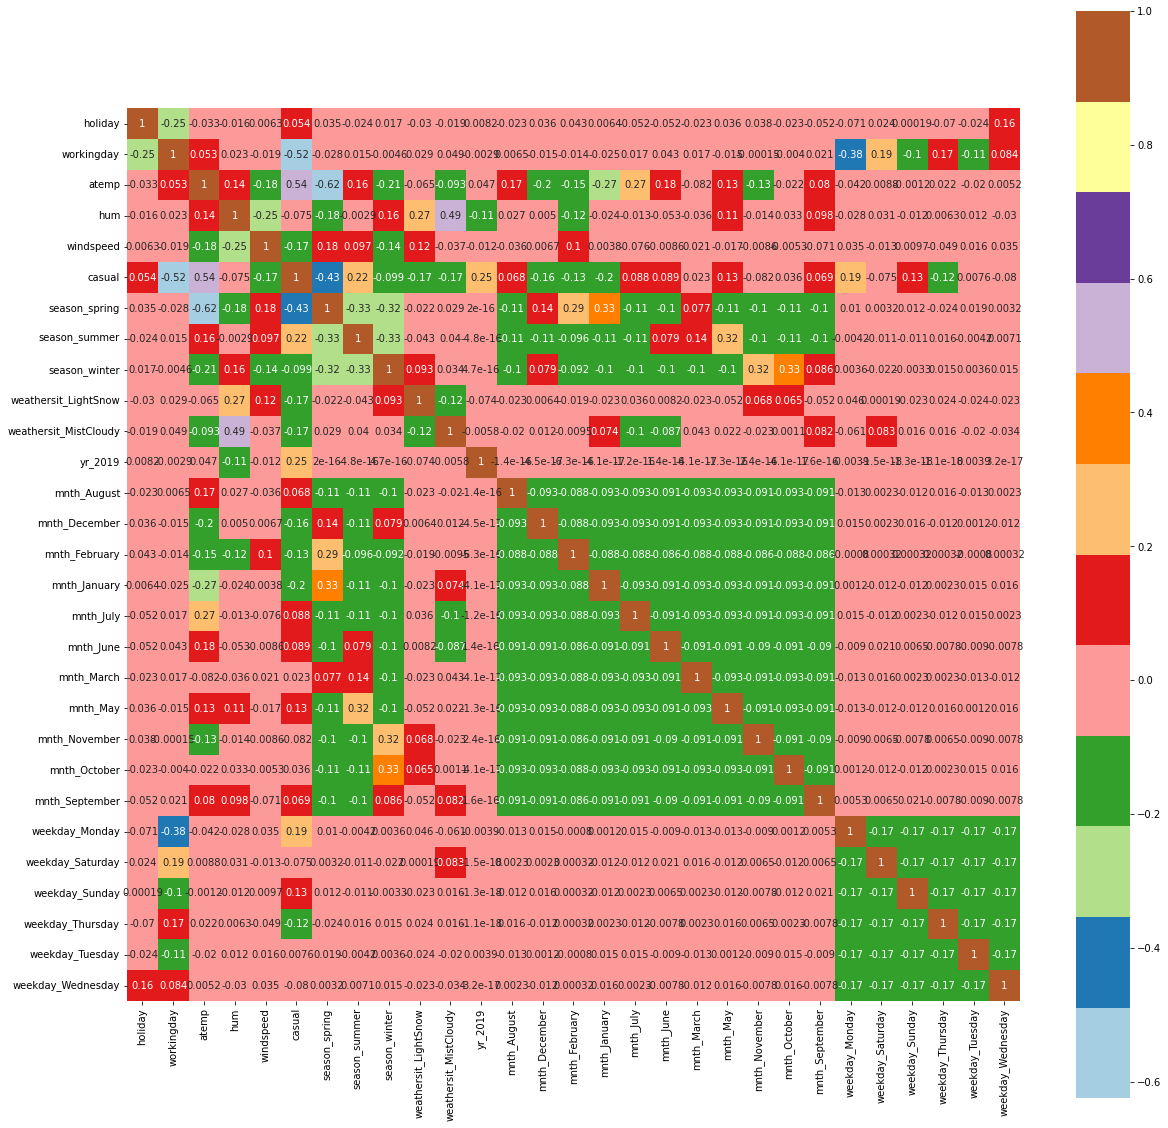

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(bs_casual.corr(), annot = True, cmap="Paired", square= True)
plt.show()

In [32]:
print("\n-----registered-----\n")
print(bs_registered.corr()['registered'].abs().sort_values(ascending=False))
print("\n-----casual-----\n")
print(bs_casual.corr()['casual'].abs().sort_values(ascending=False))


-----registered-----

registered               1.000000
yr_2019                  0.596911
atemp                    0.543678
season_spring            0.508980
workingday               0.305437
weathersit_LightSnow     0.225351
windspeed                0.217914
mnth_January             0.203910
weathersit_MistCloudy    0.138967
mnth_September           0.138107
mnth_February            0.130310
weekday_Monday           0.129602
season_winter            0.123975
mnth_December            0.122781
mnth_June                0.109148
holiday                  0.109142
mnth_August              0.092312
hum                      0.089212
season_summer            0.084721
mnth_July                0.080994
weekday_Thursday         0.075586
weekday_Saturday         0.061749
mnth_October             0.057199
mnth_May                 0.053571
weekday_Sunday           0.048231
mnth_March               0.048173
weekday_Tuesday          0.036583
mnth_November            0.028086
weekday_Wednesday        

<div class="alert alert-block alert-info">
<b>Observation:</b> 
From above correlation graphs and corelation data, there is linear relation between `cnt` and `atemp`. 
</div>

## Step 2: Preparing the data for modelling

### Train - Test split

In [33]:
from sklearn.model_selection import train_test_split
bs_train, bs_test = train_test_split(bs, train_size=0.7, random_state=100)
bsreg_train, bsreg_test = train_test_split(bs_registered, train_size=0.7, random_state=100)
bscas_train, bscas_test = train_test_split(bs_casual, train_size=0.7, random_state=100)
print(bs_train.shape)
print(bs_test.shape)
print(bsreg_train.shape)
print(bsreg_test.shape)
print(bscas_train.shape)
print(bscas_test.shape)

(510, 29)
(220, 29)
(510, 29)
(220, 29)
(510, 29)
(220, 29)


### Rescalling
For scalling we want to sacle only continous variables

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = ['atemp', 'hum', 'windspeed', 'cnt']
bs_train[num_var] = scaler.fit_transform(bs_train[num_var])
bs_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
576,0,1,0.766351,0.725633,0.294871,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0,0,0.438975,0.640189,0.285911,0.465255,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0,0,0.200348,0.498067,0.676936,0.204096,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.391735,0.504508,0.221789,0.482973,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0,1,0.318819,0.751824,0.406392,0.191095,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


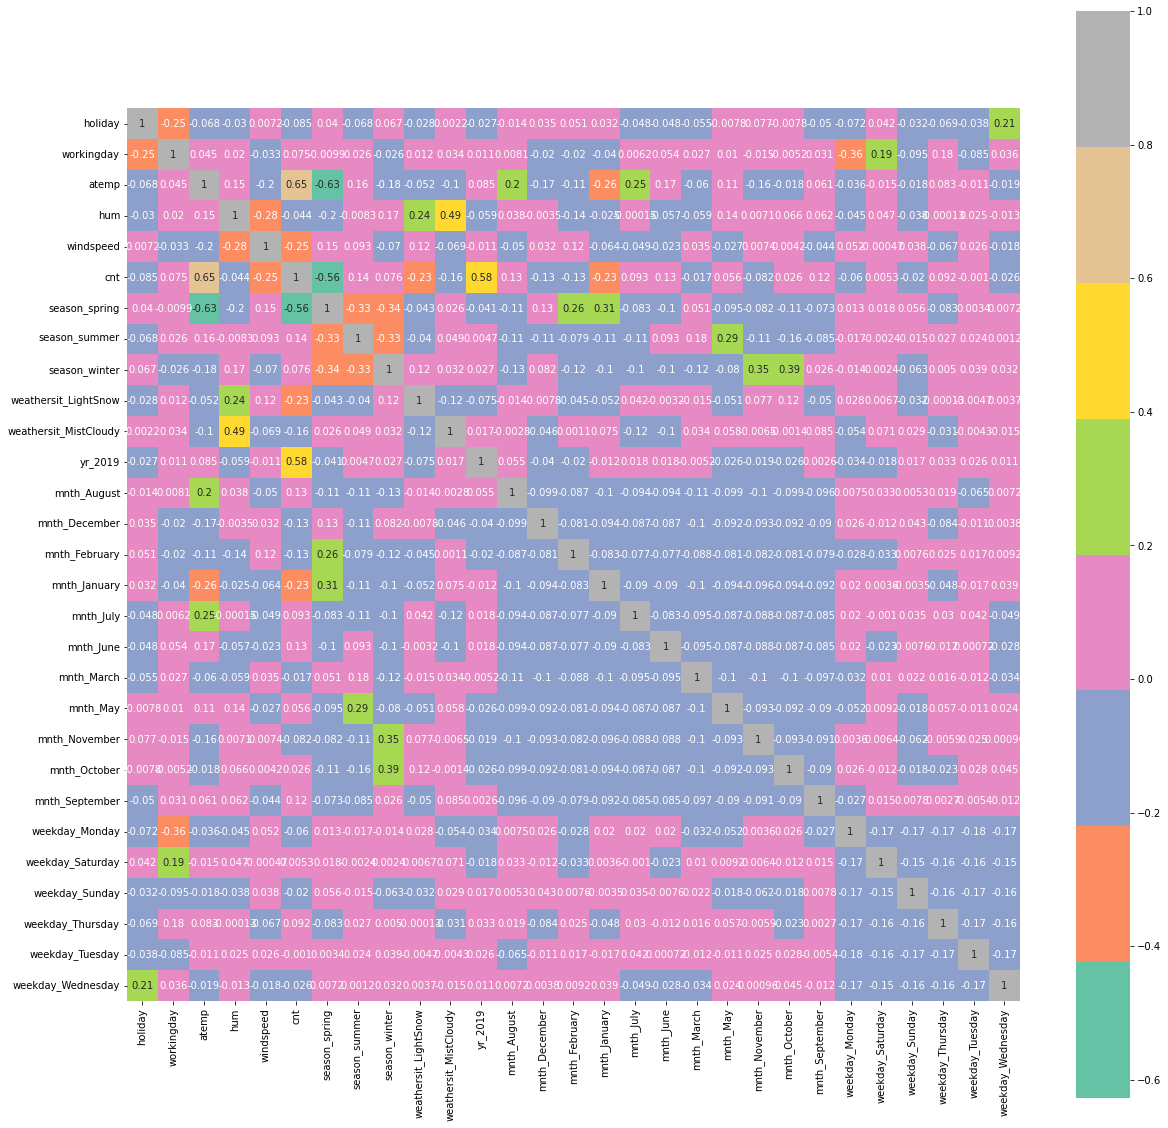

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(bs_train.corr(), annot = True, cmap="Set2", square= True)
plt.show()

In [36]:
scaler_reg = MinMaxScaler()
num_var_reg = ['atemp', 'hum', 'windspeed', 'registered']
bsreg_train[num_var_reg] = scaler_reg.fit_transform(bsreg_train[num_var_reg])
bsreg_train.head()

,holiday,workingday,atemp,hum,windspeed,registered,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
576,0,1,0.766351,0.725633,0.294871,0.899220,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0,0,0.438975,0.640189,0.285911,0.446145,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0,0,0.200348,0.498067,0.676936,0.203869,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.391735,0.504508,0.221789,0.444701,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0,1,0.318819,0.751824,0.406392,0.214554,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


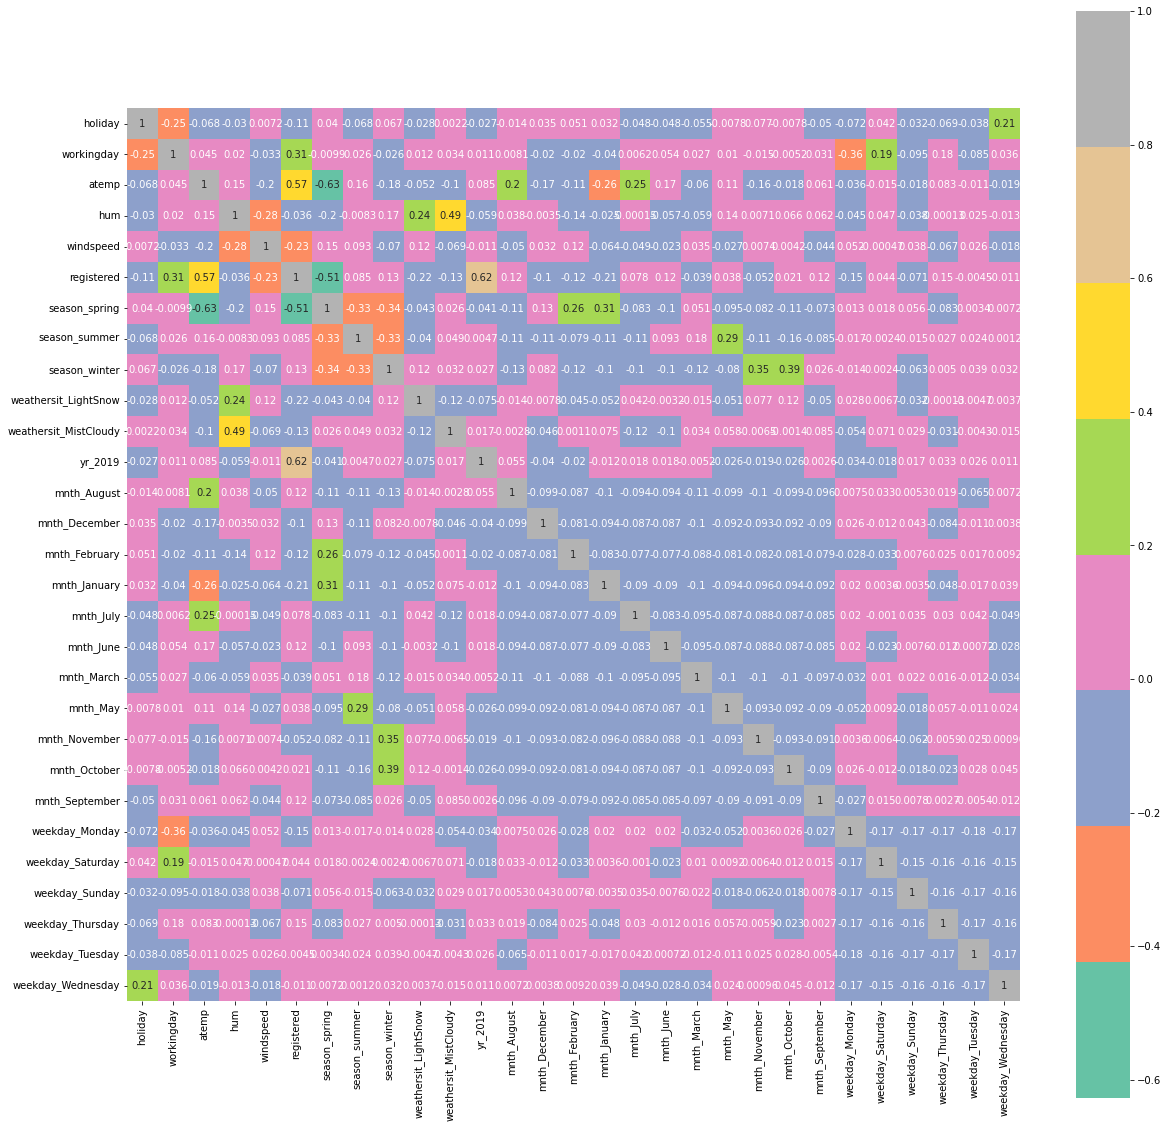

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(bsreg_train.corr(), annot = True, cmap="Set2", square= True)
plt.show()

In [38]:
scaler_cas = MinMaxScaler()
num_var_cas = ['atemp', 'hum', 'windspeed', 'casual']
bscas_train[num_var_cas] = scaler_cas.fit_transform(bscas_train[num_var_cas])
bscas_train.head()

,holiday,workingday,atemp,hum,windspeed,casual,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
576,0,1,0.766351,0.725633,0.294871,0.294422,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0,0,0.438975,0.640189,0.285911,0.290765,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0,0,0.200348,0.498067,0.676936,0.110332,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.391735,0.504508,0.221789,0.340750,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0,1,0.318819,0.751824,0.406392,0.053337,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


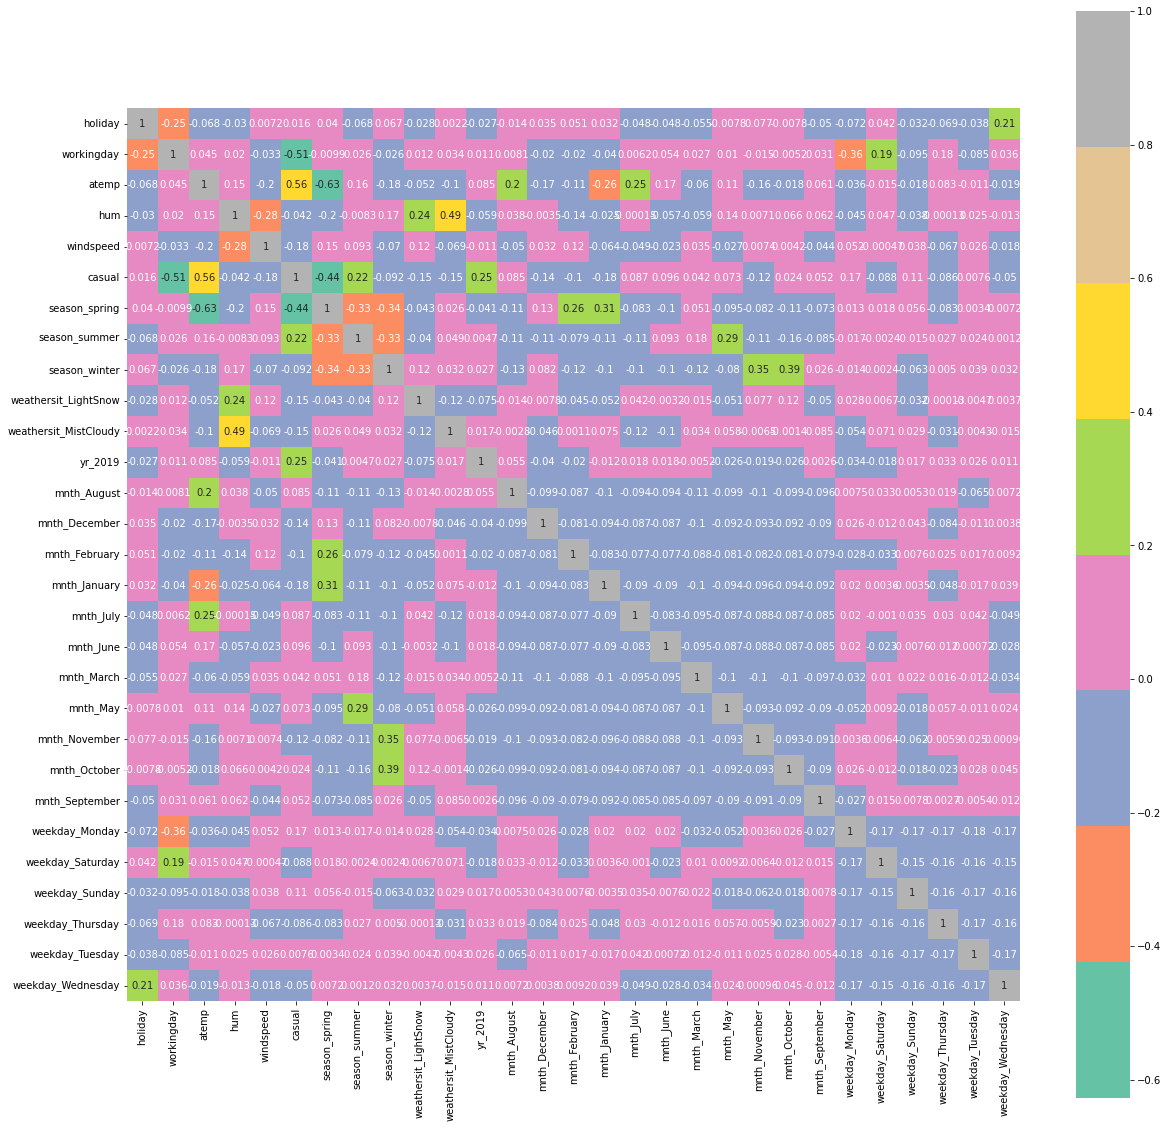

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(bscas_train.corr(), annot = True, cmap="Set2", square= True)
plt.show()

In [40]:
bs_train.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.027451,0.682353,0.506651,0.647147,0.347588,0.512546,0.252941,0.245098,0.254902,0.027451,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.163554,0.466018,0.214805,0.147853,0.162618,0.226379,0.435124,0.430568,0.436234,0.163554,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.321773,0.535208,0.229825,0.350437,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.516882,0.650064,0.322448,0.520364,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.681605,0.753327,0.434480,0.686666,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
bscas_train.describe()

,holiday,workingday,atemp,hum,windspeed,casual,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.027451,0.682353,0.506651,0.647147,0.347588,0.250325,0.252941,0.245098,0.254902,0.027451,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.163554,0.466018,0.214805,0.147853,0.162618,0.204823,0.435124,0.430568,0.436234,0.163554,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.321773,0.535208,0.229825,0.087321,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.516882,0.650064,0.322448,0.211826,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.681605,0.753327,0.434480,0.322310,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
bsreg_train.describe()

,holiday,workingday,atemp,hum,windspeed,registered,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.027451,0.682353,0.506651,0.647147,0.347588,0.524651,0.252941,0.245098,0.254902,0.027451,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.163554,0.466018,0.214805,0.147853,0.162618,0.230127,0.435124,0.430568,0.436234,0.163554,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.321773,0.535208,0.229825,0.351105,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.516882,0.650064,0.322448,0.530826,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.681605,0.753327,0.434480,0.699430,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
bs_corr = pd.DataFrame(bs_train.corr()['cnt'].abs().sort_values(ascending=False))
bs_reg_corr = pd.DataFrame(bsreg_train.corr()['registered'].abs().sort_values(ascending=False))
bs_cas_corr = pd.DataFrame(bscas_train.corr()['casual'].abs().sort_values(ascending=False))

bs_corr = bs_corr.rename_axis('Features')
bs_reg_corr = bs_reg_corr.rename_axis('Features')
bs_cas_corr = bs_cas_corr.rename_axis('Features')

bs_corr = bs_corr.merge(bs_reg_corr, on="Features" ,how="outer")
bs_corr = bs_corr.merge(bs_cas_corr, on="Features" ,how="outer")
bs_corr.sort_values(['cnt', 'registered', 'casual'],ascending=False)
display(bs_corr)

,cnt,registered,casual
Features,,,
cnt,1.000000,NaN,NaN
atemp,0.651845,0.566778,0.564355
yr_2019,0.583273,0.615172,0.248800
season_spring,0.562674,0.510888,0.435821
windspeed,0.247485,0.230093,0.178917
mnth_January,0.229526,0.207941,0.178871
weathersit_LightSnow,0.228949,0.218576,0.151960
weathersit_MistCloudy,0.155205,0.128759,0.149059
season_summer,0.144169,0.084846,0.220894


In [44]:
ytrain = bs_train.pop('cnt')
Xtrain = bs_train
ytrain_reg = bsreg_train.pop('registered')
Xtrain_reg = bsreg_train
ytrain_cas = bscas_train.pop('casual')
Xtrain_cas = bscas_train

## Step 3: Training the model
We will start of with automated RFE model and then start manually analyzing the data

### RFE method
In RFE method lets start with 15 features, cutting it down to half

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [46]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(Xtrain, ytrain)
col = Xtrain.columns[rfe.support_]
col_eliminated = Xtrain.columns[~rfe.support_]

In [47]:
lr_reg = LinearRegression()
lr_reg.fit(Xtrain_reg, ytrain_reg)
rfe_reg = RFE(lr_reg,n_features_to_select=15)
rfe_reg = rfe_reg.fit(Xtrain_reg, ytrain_reg)
col_reg = Xtrain_reg.columns[rfe_reg.support_]
col_reg_eliminated = Xtrain_reg.columns[~rfe_reg.support_]

In [48]:
lr_cas = LinearRegression()
lr_cas.fit(Xtrain_cas, ytrain_cas)
rfe_cas = RFE(lr_cas,n_features_to_select=15)
rfe_cas = rfe_cas.fit(Xtrain_cas, ytrain_cas)
col_cas = Xtrain_cas.columns[rfe_cas.support_]
col_cas_eliminated = Xtrain_cas.columns[~rfe_cas.support_]

In [49]:
col_list = pd.DataFrame(list(zip(Xtrain.columns, rfe.support_,rfe.ranking_))).rename(columns={0: "Features", 1: "CNT_enabled", 2: "CNT_Ranking"})
col_list_reg = pd.DataFrame(list(zip(Xtrain_reg.columns, rfe_reg.support_,rfe_reg.ranking_))).rename(columns={0: "REG_Features", 1: "REG_enabled", 2: "REG_Ranking"})
col_list_cas = pd.DataFrame(list(zip(Xtrain_cas.columns, rfe_cas.support_,rfe_cas.ranking_))).rename(columns={0: "CAS_Features", 1: "CAS_enabled", 2: "CAS_Ranking"})

In [50]:
display(col_list)
display(col_list_reg)
display(col_list_cas)

,Features,CNT_enabled,CNT_Ranking
0,holiday,True,1
1,workingday,False,3
2,atemp,True,1
3,hum,True,1
4,windspeed,True,1
5,season_spring,True,1
6,season_summer,True,1
7,season_winter,True,1
8,weathersit_LightSnow,True,1
9,weathersit_MistCloudy,True,1


,REG_Features,REG_enabled,REG_Ranking
0,holiday,False,9
1,workingday,True,1
2,atemp,True,1
3,hum,True,1
4,windspeed,True,1
5,season_spring,True,1
6,season_summer,False,3
7,season_winter,True,1
8,weathersit_LightSnow,True,1
9,weathersit_MistCloudy,True,1


,CAS_Features,CAS_enabled,CAS_Ranking
0,holiday,True,1
1,workingday,True,1
2,atemp,True,1
3,hum,True,1
4,windspeed,True,1
5,season_spring,True,1
6,season_summer,True,1
7,season_winter,False,14
8,weathersit_LightSnow,True,1
9,weathersit_MistCloudy,True,1


In [51]:
combine_list = pd.concat([col_list, col_list_reg, col_list_cas], axis=1)
combine_list = combine_list.drop(['REG_Features','CAS_Features'], axis =1)
dfi.export(combine_list,"img/Starting_features.png")
combine_list

[0413/020643.022246:INFO:headless_shell.cc(659)] Written to file /var/folders/7v/k8c1f2wn5nv_9c15ft5q88gm0000gp/T/tmpjoz8voo4/temp.png.
[0413/020645.069984:INFO:headless_shell.cc(659)] Written to file /var/folders/7v/k8c1f2wn5nv_9c15ft5q88gm0000gp/T/tmpkdi_0nrg/temp.png.


,Features,CNT_enabled,CNT_Ranking,REG_enabled,REG_Ranking,CAS_enabled,CAS_Ranking
0,holiday,True,1,False,9,True,1
1,workingday,False,3,True,1,True,1
2,atemp,True,1,True,1,True,1
3,hum,True,1,True,1,True,1
4,windspeed,True,1,True,1,True,1
5,season_spring,True,1,True,1,True,1
6,season_summer,True,1,False,3,True,1
7,season_winter,True,1,True,1,False,14
8,weathersit_LightSnow,True,1,True,1,True,1
9,weathersit_MistCloudy,True,1,True,1,True,1


<div class="alert alert-block alert-success">
<b>Observation:</b>Doing RFE model training as giving us a starting set of features. Analyzing the feature dependency
  
    •Holiday has very low impact on register customers but has a big effect on casual customers. As a result, there is some impact on overall demand.
    •Even though working day does not have impact on overall demand, there is impact on registered and casual customers independently.
    •During summer and winter there is no effect on demand, mostly due to casual customers.
    •January and July there is demand change from registered customers no demand change from casual customers
    •In March and October there is demand change for casual customers but no effect on overall demand.
    •In November there is demand change form registered customers which is affecting overall demand.
    •There is change in demand on Saturday from causal customers that is affecting overall demand.
    •There is change in demand on Wednesday from registered customers, this is not affecting overall demand.

At this point of we can only analyze that there is change in demand. What the change is and how much is changed will be determined after doing the full model training.
</div>

### Manual elimenation of features
- Lets start doing more detailed analysis of the model using more statical library.
- We will start with all the features in `col` and then start removing each feature and analyze differnt parameters

We will be using p-value and VIF as our guode to see which feature to remove and R-sqaured and Adj; R-squared to see how good the model is

#### Order of removing variables
- High p-value, high VIF
- High p-value, low VIF
        This might remove variables that explain other variables, Which brings the VIF of other independednt variable down.
- Low p-value, High VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_vs_pValue(model, training_data):
    p_value = pd.DataFrame(model.pvalues)
    p_value = p_value.rename_axis('Features')
    p_value = p_value.rename(columns={p_value.columns[0]: 'p_value'})
    p_value['p_value'] = round(p_value['p_value'], 3)
    p_value = p_value.sort_values(by = 'p_value', ascending=False)
    
    vif = pd.DataFrame()
    vif['Features'] = training_data.columns
    vif['VIF'] = [variance_inflation_factor(training_data.values, i) for i in range(training_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = pd.merge(p_value, vif,on = 'Features')
    vif = vif.sort_values(by = ['p_value', 'VIF'], ascending=False)
    display(vif)
    return vif

In [53]:
import statsmodels.api as sm
def manualRFE(X,y):
    X_ = sm.add_constant(X)
    lrm = sm.OLS(y, X_).fit()
    display(lrm.summary())
    vif = VIF_vs_pValue(lrm, X_)
    print(f"Coloumns: {X_.columns}")
    return lrm, X_

##### Model 1:

In [54]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.51e-181
Time:                        02:06:46   Log-Likelihood:                 492.39
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     494   BIC:                            -885.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3157      0.036      8.675      0.000       0.244       0.387
holiday                  -0.0559      0.026     -2.180      0.030      -0.106      -0.006
atemp                     0.5152      0.035     14.664      0.000       0.446       0.584
hum                      -0.1554      0.039     -4.032      0.000      -0.231      -0.080
windspeed                -0.1858      0.028     -6.599      0.000      -0.241      -0.130
season_spring            -0.0799      0.020     -3.993      0.000      -0.119      -0.041
season_summer             0.0344      0.014      2.470      0.014       0.007       0.062
season_winter             0.0814      0.016      4.982      0.000       0.049       0.113
weathersit_LightSnow     -0.2157      0.029     -7.568      0.000      -0.272      -0.160
weathersit_MistCloudy    -0.0508      0.011     -4.623      0.000      -0.072      -0.029
yr_2019                   0.2319      0.008     27.536      0.000       0.215       0.248
mnth_January             -0.0285      0.016     -1.795      0.073      -0.060       0.003
mnth_July                -0.0387      0.017     -2.310      0.021      -0.072      -0.006
mnth_November            -0.0328      0.016     -2.035      0.042      -0.064      -0.001
mnth_September            0.0548      0.016      3.461      0.001       0.024       0.086
weekday_Saturday          0.0261      0.012      2.106      0.036       0.002       0.050
==============================================================================
Omnibus:                       73.938   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.149
Skew:                          -0.736   Prob(JB):                     2.30e-41
Kurtosis:                       5.577   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_January,0.073,1.18
1,mnth_November,0.042,1.19
2,weekday_Saturday,0.036,1.01
3,holiday,0.030,1.02
4,mnth_July,0.021,1.15
5,season_summer,0.014,2.08
6,mnth_September,0.001,1.08
7,const,0.000,77.08
11,season_spring,0.000,4.40
8,atemp,0.000,3.31


Coloumns: Index(['const', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightSnow',
       'weathersit_MistCloudy', 'yr_2019', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday'],
      dtype='object')


<div class="alert alert-block alert-info">
<b>Observation:</b> Model 1:
    
    - Using Features:
        'holiday' 'atemp' 'hum' 'windspeed' 'season_spring' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_January' 'mnth_July' 'mnth_November' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.834
        * Adj. R-squared: 0.829
        * Prob (F-statistic): 1.51e-181
        * AIC: -952.8
        * BIC: -885.0
    - Conclusion:
        Adjusted R-Sqaure is high which is a good inidcation for the model.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
        Features with high p-value are present which means there Beta value is insignificant, we need to eliminate them one by one.
        High VIF > 2 are present, means these features can be explained by other features, We will first handle p-value.
    - Next step:
        let's remove 'mnth_January' from the model and see the result

</div>

##### Model 2:

In [55]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col.drop(['mnth_January'])], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.53e-182
Time:                        02:06:46   Log-Likelihood:                 490.73
No. Observations:                 510   AIC:                            -951.5
Df Residuals:                     495   BIC:                            -887.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3059      0.036      8.482      0.000       0.235       0.377
holiday                  -0.0567      0.026     -2.205      0.028      -0.107      -0.006
atemp                     0.5239      0.035     15.024      0.000       0.455       0.592
hum                      -0.1558      0.039     -4.033      0.000      -0.232      -0.080
windspeed                -0.1798      0.028     -6.417      0.000      -0.235      -0.125
season_spring            -0.0814      0.020     -4.063      0.000      -0.121      -0.042
season_summer             0.0365      0.014      2.624      0.009       0.009       0.064
season_winter             0.0838      0.016      5.136      0.000       0.052       0.116
weathersit_LightSnow     -0.2145      0.029     -7.512      0.000      -0.271      -0.158
weathersit_MistCloudy    -0.0515      0.011     -4.684      0.000      -0.073      -0.030
yr_2019                   0.2318      0.008     27.454      0.000       0.215       0.248
mnth_July                -0.0366      0.017     -2.189      0.029      -0.070      -0.004
mnth_November            -0.0297      0.016     -1.852      0.065      -0.061       0.002
mnth_September            0.0579      0.016      3.668      0.000       0.027       0.089
weekday_Saturday          0.0262      0.012      2.107      0.036       0.002       0.051
==============================================================================
Omnibus:                       73.318   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.242
Skew:                          -0.727   Prob(JB):                     2.19e-41
Kurtosis:                       5.587   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_November,0.065,1.18
1,weekday_Saturday,0.036,1.01
2,mnth_July,0.029,1.15
3,holiday,0.028,1.02
4,season_summer,0.009,2.07
5,const,0.000,75.34
9,season_spring,0.000,4.40
6,atemp,0.000,3.24
10,season_winter,0.000,2.93
7,hum,0.000,1.89


Coloumns: Index(['const', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightSnow',
       'weathersit_MistCloudy', 'yr_2019', 'mnth_July', 'mnth_November',
       'mnth_September', 'weekday_Saturday'],
      dtype='object')


<div class="alert alert-block alert-info">
<b>Observation:</b> Model 2:
    
    - Using Features:
        'holiday' 'atemp' 'hum' 'windspeed' 'season_spring' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_July' 'mnth_November' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.833
        * Adj. R-squared: 0.828
        * Prob (F-statistic): 5.53e-182
    - Conclusion:
        No change in Adj. R-Sqaured value which makes sense since we only removed variable with lease significant.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
    - Next step:
        let's remove 'mnth_November' from the model and see the result

</div>

##### Model 3:

In [56]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col.drop(['mnth_January','mnth_November'])], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.16e-182
Time:                        02:06:46   Log-Likelihood:                 488.97
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     496   BIC:                            -890.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2986      0.036      8.309      0.000       0.228       0.369
holiday                  -0.0588      0.026     -2.285      0.023      -0.109      -0.008
atemp                     0.5299      0.035     15.224      0.000       0.461       0.598
hum                      -0.1532      0.039     -3.958      0.000      -0.229      -0.077
windspeed                -0.1796      0.028     -6.392      0.000      -0.235      -0.124
season_spring            -0.0789      0.020     -3.939      0.000      -0.118      -0.040
season_summer             0.0374      0.014      2.692      0.007       0.010       0.065
season_winter             0.0788      0.016      4.887      0.000       0.047       0.111
weathersit_LightSnow     -0.2165      0.029     -7.569      0.000      -0.273      -0.160
weathersit_MistCloudy    -0.0516      0.011     -4.681      0.000      -0.073      -0.030
yr_2019                   0.2320      0.008     27.421      0.000       0.215       0.249
mnth_July                -0.0352      0.017     -2.098      0.036      -0.068      -0.002
mnth_September            0.0610      0.016      3.873      0.000       0.030       0.092
weekday_Saturday          0.0260      0.012      2.089      0.037       0.002       0.051
==============================================================================
Omnibus:                       73.162   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.401
Skew:                          -0.727   Prob(JB):                     3.34e-41
Kurtosis:                       5.581   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weekday_Saturday,0.037,1.01
1,mnth_July,0.036,1.14
2,holiday,0.023,1.02
3,season_summer,0.007,2.06
4,const,0.000,74.43
8,season_spring,0.000,4.38
5,atemp,0.000,3.22
9,season_winter,0.000,2.85
6,hum,0.000,1.88
11,weathersit_MistCloudy,0.000,1.60


Coloumns: Index(['const', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightSnow',
       'weathersit_MistCloudy', 'yr_2019', 'mnth_July', 'mnth_September',
       'weekday_Saturday'],
      dtype='object')


<div class="alert alert-block alert-info">
<b>Observation:</b> Model 3:
    
    - Using Features:
        'holiday' 'atemp' 'hum' 'windspeed' 'season_spring' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_July' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.832
        * Adj. R-squared: 0.827
        * Prob (F-statistic): 2.16e-182
    - Conclusion:
        No change in Adj. R-Sqaured value which makes sense since we only removed variable with lease significant.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
    - Next step:
        let's remove 'weekday_Saturday' from the model and see the result

</div>

##### Model 4:

In [57]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col.drop(['mnth_January','mnth_November','weekday_Saturday'])], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.29e-182
Time:                        02:06:46   Log-Likelihood:                 486.74
No. Observations:                 510   AIC:                            -947.5
Df Residuals:                     497   BIC:                            -892.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3001      0.036      8.326      0.000       0.229       0.371
holiday                  -0.0565      0.026     -2.190      0.029      -0.107      -0.006
atemp                     0.5306      0.035     15.193      0.000       0.462       0.599
hum                      -0.1523      0.039     -3.922      0.000      -0.229      -0.076
windspeed                -0.1793      0.028     -6.362      0.000      -0.235      -0.124
season_spring            -0.0781      0.020     -3.886      0.000      -0.118      -0.039
season_summer             0.0378      0.014      2.707      0.007       0.010       0.065
season_winter             0.0792      0.016      4.892      0.000       0.047       0.111
weathersit_LightSnow     -0.2159      0.029     -7.521      0.000      -0.272      -0.159
weathersit_MistCloudy    -0.0504      0.011     -4.563      0.000      -0.072      -0.029
yr_2019                   0.2317      0.008     27.298      0.000       0.215       0.248
mnth_July                -0.0347      0.017     -2.066      0.039      -0.068      -0.002
mnth_September            0.0615      0.016      3.892      0.000       0.030       0.092
==============================================================================
Omnibus:                       73.560   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.582
Skew:                          -0.711   Prob(JB):                     7.56e-44
Kurtosis:                       5.706   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_July,0.039,1.14
1,holiday,0.029,1.02
2,season_summer,0.007,2.06
3,const,0.000,74.39
7,season_spring,0.000,4.37
4,atemp,0.000,3.22
8,season_winter,0.000,2.85
5,hum,0.000,1.88
10,weathersit_MistCloudy,0.000,1.59
9,weathersit_LightSnow,0.000,1.26


Coloumns: Index(['const', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightSnow',
       'weathersit_MistCloudy', 'yr_2019', 'mnth_July', 'mnth_September'],
      dtype='object')


<div class="alert alert-block alert-info">
<b>Observation:</b> Model 4:
    
    - Using Features:
        'holiday' 'atemp' 'hum' 'windspeed' 'season_spring' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_July' 'mnth_November' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.830
        * Adj. R-squared: 0.826
        * Prob (F-statistic): 1.29e-182
    - Conclusion:
        No change in Adj. R-Sqaured value which makes sense since we only removed variable with lease significant.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
    - Next step:
        let's remove 'mnth_July' from the model and see the result

</div>

##### Model 5:

In [58]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col.drop(['mnth_January','mnth_November','weekday_Saturday','mnth_July'])], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.07e-183
Time:                        02:06:46   Log-Likelihood:                 484.56
No. Observations:                 510   AIC:                            -945.1
Df Residuals:                     498   BIC:                            -894.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2983      0.036      8.252      0.000       0.227       0.369
holiday                  -0.0543      0.026     -2.098      0.036      -0.105      -0.003
atemp                     0.5226      0.035     15.008      0.000       0.454       0.591
hum                      -0.1529      0.039     -3.925      0.000      -0.229      -0.076
windspeed                -0.1795      0.028     -6.349      0.000      -0.235      -0.124
season_spring            -0.0757      0.020     -3.758      0.000      -0.115      -0.036
season_summer             0.0432      0.014      3.139      0.002       0.016       0.070
season_winter             0.0832      0.016      5.160      0.000       0.052       0.115
weathersit_LightSnow     -0.2182      0.029     -7.585      0.000      -0.275      -0.162
weathersit_MistCloudy    -0.0491      0.011     -4.437      0.000      -0.071      -0.027
yr_2019                   0.2316      0.009     27.193      0.000       0.215       0.248
mnth_September            0.0654      0.016      4.157      0.000       0.034       0.096
==============================================================================
Omnibus:                       77.322   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.233
Skew:                          -0.745   Prob(JB):                     2.23e-46
Kurtosis:                       5.770   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,holiday,0.036,1.02
1,season_summer,0.002,1.99
2,const,0.000,74.35
6,season_spring,0.000,4.36
3,atemp,0.000,3.18
7,season_winter,0.000,2.81
4,hum,0.000,1.88
9,weathersit_MistCloudy,0.000,1.59
8,weathersit_LightSnow,0.000,1.26
5,windspeed,0.000,1.20


Coloumns: Index(['const', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightSnow',
       'weathersit_MistCloudy', 'yr_2019', 'mnth_September'],
      dtype='object')


<div class="alert alert-block alert-info">
<b>Observation:</b> Model 5:
    
    - Using Features:
        'holiday' 'atemp' 'hum' 'windspeed' 'season_spring' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_November' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.829
        * Adj. R-squared: 0.825
        * Prob (F-statistic): 7.07e-183
    - Conclusion:
        No change in Adj. R-Sqaured value which makes sense since we only removed variable with lease significant.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
    - Next step:
        let's remove 'holiday' from the model and see the result

</div>

##### Model 6:

In [59]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col.drop(['mnth_January','mnth_November','weekday_Saturday','mnth_July','holiday'])], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.96e-183
Time:                        02:06:46   Log-Likelihood:                 482.31
No. Observations:                 510   AIC:                            -942.6
Df Residuals:                     499   BIC:                            -896.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2949      0.036      8.137      0.000       0.224       0.366
atemp                     0.5238      0.035     14.993      0.000       0.455       0.592
hum                      -0.1510      0.039     -3.864      0.000      -0.228      -0.074
windspeed                -0.1796      0.028     -6.330      0.000      -0.235      -0.124
season_spring            -0.0760      0.020     -3.762      0.000      -0.116      -0.036
season_summer             0.0441      0.014      3.194      0.001       0.017       0.071
season_winter             0.0819      0.016      5.066      0.000       0.050       0.114
weathersit_LightSnow     -0.2164      0.029     -7.499      0.000      -0.273      -0.160
weathersit_MistCloudy    -0.0494      0.011     -4.448      0.000      -0.071      -0.028
yr_2019                   0.2321      0.009     27.174      0.000       0.215       0.249
mnth_September            0.0671      0.016      4.259      0.000       0.036       0.098
==============================================================================
Omnibus:                       85.403   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.328
Skew:                          -0.802   Prob(JB):                     5.34e-54
Kurtosis:                       5.995   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,season_summer,0.001,1.99
1,const,0.000,74.20
5,season_spring,0.000,4.36
2,atemp,0.000,3.17
6,season_winter,0.000,2.80
3,hum,0.000,1.88
8,weathersit_MistCloudy,0.000,1.59
7,weathersit_LightSnow,0.000,1.26
4,windspeed,0.000,1.20
10,mnth_September,0.000,1.04


Coloumns: Index(['const', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_September'],
      dtype='object')


<div class="alert alert-block alert-info">
<b>Observation:</b> Model 6:
    
    - Using Features:
        'atemp' 'hum' 'windspeed' 'season_spring' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_July' 'mnth_November' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.827
        * Adj. R-squared: 0.824
        * Prob (F-statistic): 3.96e-183
    - Conclusion:
        No change in Adj. R-Sqaured value which makes sense since we only removed variable with lease significant.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
        All the features with low P-value are dropped.
    - Next step:
        Lets's drop features with high VIF value > 2
        let's remove 'season_spring' from the model and see the result

</div>

##### Model 7:

In [60]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col.drop(['mnth_January','mnth_November','weekday_Saturday','mnth_July','holiday','season_spring'])], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.51e-181
Time:                        02:06:46   Log-Likelihood:                 475.18
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     500   BIC:                            -888.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2114      0.029      7.284      0.000       0.154       0.268
atemp                     0.6270      0.022     28.605      0.000       0.584       0.670
hum                      -0.1597      0.040     -4.042      0.000      -0.237      -0.082
windspeed                -0.1860      0.029     -6.484      0.000      -0.242      -0.130
season_summer             0.0774      0.011      7.229      0.000       0.056       0.098
season_winter             0.1276      0.011     11.846      0.000       0.106       0.149
weathersit_LightSnow     -0.2089      0.029     -7.164      0.000      -0.266      -0.152
weathersit_MistCloudy    -0.0479      0.011     -4.263      0.000      -0.070      -0.026
yr_2019                   0.2298      0.009     26.626      0.000       0.213       0.247
mnth_September            0.0737      0.016      4.642      0.000       0.042       0.105
==============================================================================
Omnibus:                       73.840   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.565
Skew:                          -0.681   Prob(JB):                     1.27e-48
Kurtosis:                       5.920   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,const,0.0,46.34
2,hum,0.0,1.88
7,weathersit_MistCloudy,0.0,1.58
6,weathersit_LightSnow,0.0,1.25
1,atemp,0.0,1.22
5,season_winter,0.0,1.21
3,windspeed,0.0,1.20
4,season_summer,0.0,1.17
8,yr_2019,0.0,1.02
9,mnth_September,0.0,1.02


Coloumns: Index(['const', 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'weathersit_LightSnow', 'weathersit_MistCloudy', 'yr_2019',
       'mnth_September'],
      dtype='object')


<div class="alert alert-block alert-info">
<b>Observation:</b> Model 7:
    
    - Using Features:
        'holiday' 'atemp' 'hum' 'windspeed' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_July' 'mnth_November' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.822
        * Adj. R-squared: 0.819
        * Prob (F-statistic): 2.51e-181
    - Conclusion:
        No change in Adj. R-Sqaured value which makes sense since we only removed variable with lease significant.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
    - Next step:
        Even though VIF value of hum is less then 2 it is very close to 2 Lets drop hum also

</div>

##### Model 8:

In [61]:
lrm_model, Xtrain_sm = manualRFE(Xtrain[col.drop(['mnth_January','mnth_November','weekday_Saturday','mnth_July','holiday','season_spring', 'hum'])], ytrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     278.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.41e-179
Time:                        02:06:46   Log-Likelihood:                 466.98
No. Observations:                 510   AIC:                            -916.0
Df Residuals:                     501   BIC:                            -877.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1188      0.018      6.567      0.000       0.083       0.154
atemp                     0.6041      0.021     28.102      0.000       0.562       0.646
windspeed                -0.1517      0.028     -5.453      0.000      -0.206      -0.097
season_summer             0.0765      0.011      7.039      0.000       0.055       0.098
season_winter             0.1198      0.011     11.135      0.000       0.099       0.141
weathersit_LightSnow     -0.2552      0.027     -9.374      0.000      -0.309      -0.202
weathersit_MistCloudy    -0.0743      0.009     -7.989      0.000      -0.093      -0.056
yr_2019                   0.2330      0.009     26.714      0.000       0.216       0.250
mnth_September            0.0730      0.016      4.534      0.000       0.041       0.105
==============================================================================
Omnibus:                       70.963   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.288
Skew:                          -0.682   Prob(JB):                     6.47e-43
Kurtosis:                       5.699   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,const,0.0,17.47
3,season_summer,0.0,1.17
4,season_winter,0.0,1.17
1,atemp,0.0,1.14
2,windspeed,0.0,1.09
5,weathersit_LightSnow,0.0,1.06
6,weathersit_MistCloudy,0.0,1.05
7,yr_2019,0.0,1.02
8,mnth_September,0.0,1.02


Coloumns: Index(['const', 'atemp', 'windspeed', 'season_summer', 'season_winter',
       'weathersit_LightSnow', 'weathersit_MistCloudy', 'yr_2019',
       'mnth_September'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Observation:</b> Model 8:
    
    - Using Features:
        'holiday' 'atemp' 'windspeed' 'season_spring' 'season_summer'
        'season_winter' 'weathersit_LightSnow' 'weathersit_MistCloudy' 'yr_2019'
        'mnth_July' 'mnth_November' 'mnth_September' 'weekday_Saturday'
    - Parameters:
        * R-squared: 0.817
        * Adj. R-squared: 0.814
        * Prob (F-statistic): 4.41e-179
    - Conclusion:
        No change in Adj. R-Sqaured value which makes sense since we only removed variable with lease significant.
        Prob of F-Statistic is almost 0, p-value ~0 that means model fits the data in good way.
        VIF value for all features is low less then 2.
        p-value for all features is 0.
        We can consider this as our final model.
</div>

In [62]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.33e-193
Time:                        02:06:46   Log-Likelihood:                 512.81
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     494   BIC:                            -925.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2570      0.033      7.872      0.000       0.193       0.321
workingday                0.1400      0.009     16.210      0.000       0.123       0.157
atemp                     0.4150      0.031     13.534      0.000       0.355       0.475
hum                      -0.1231      0.037     -3.327      0.001      -0.196      -0.050
windspeed                -0.1510      0.027     -5.610      0.000      -0.204      -0.098
season_spring            -0.0960      0.015     -6.462      0.000      -0.125      -0.067
season_winter             0.0878      0.012      7.190      0.000       0.064       0.112
weathersit_LightSnow     -0.2306      0.027     -8.429      0.000      -0.284      -0.177
weathersit_MistCloudy    -0.0507      0.011     -4.802      0.000      -0.071      -0.030
yr_2019                   0.2536      0.008     31.390      0.000       0.238       0.270
mnth_January             -0.0197      0.015     -1.297      0.195      -0.050       0.010
mnth_July                -0.0357      0.016     -2.258      0.024      -0.067      -0.005
mnth_November            -0.0308      0.015     -1.996      0.047      -0.061      -0.000
mnth_September            0.0547      0.015      3.653      0.000       0.025       0.084
weekday_Sunday           -0.0221      0.012     -1.865      0.063      -0.045       0.001
weekday_Wednesday        -0.0223      0.012     -1.888      0.060      -0.046       0.001
==============================================================================
Omnibus:                      139.398   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.174
Skew:                          -1.215   Prob(JB):                    2.72e-111
Kurtosis:                       7.249   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_January,0.195,1.17
1,weekday_Sunday,0.063,1.05
2,weekday_Wednesday,0.060,1.03
3,mnth_November,0.047,1.19
4,mnth_July,0.024,1.11
5,hum,0.001,1.88
6,const,0.000,67.22
8,atemp,0.000,2.73
10,season_spring,0.000,2.63
11,season_winter,0.000,1.79


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weekday_Sunday', 'weekday_Wednesday'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     88.32
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.15e-129
Time:                        02:06:46   Log-Likelihood:                 417.87
No. Observations:                 510   AIC:                            -803.7
Df Residuals:                     494   BIC:                            -736.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2702      0.038      7.199      0.000       0.196       0.344
holiday                  -0.0841      0.031     -2.741      0.006      -0.144      -0.024
workingday               -0.2449      0.011    -22.424      0.000      -0.266      -0.223
atemp                     0.4546      0.030     15.147      0.000       0.396       0.514
hum                      -0.1299      0.044     -2.946      0.003      -0.217      -0.043
windspeed                -0.1583      0.032     -4.885      0.000      -0.222      -0.095
season_spring            -0.0375      0.016     -2.405      0.017      -0.068      -0.007
season_summer             0.0690      0.013      5.433      0.000       0.044       0.094
weathersit_LightSnow     -0.1006      0.033     -3.046      0.002      -0.165      -0.036
weathersit_MistCloudy    -0.0319      0.013     -2.514      0.012      -0.057      -0.007
yr_2019                   0.0814      0.010      8.389      0.000       0.062       0.100
mnth_March                0.0495      0.017      2.967      0.003       0.017       0.082
mnth_October              0.0584      0.018      3.209      0.001       0.023       0.094
mnth_September            0.0436      0.018      2.403      0.017       0.008       0.079
weekday_Saturday          0.0322      0.015      2.176      0.030       0.003       0.061
weekday_Sunday            0.0447      0.014      3.139      0.002       0.017       0.073
==============================================================================
Omnibus:                       92.363   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.905
Skew:                           0.887   Prob(JB):                     5.42e-55
Kurtosis:                       5.935   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weekday_Saturday,0.030,1.07
1,season_spring,0.017,1.99
2,mnth_September,0.017,1.06
3,weathersit_MistCloudy,0.012,1.59
4,holiday,0.006,1.09
5,hum,0.003,1.84
6,mnth_March,0.003,1.07
7,weathersit_LightSnow,0.002,1.27
8,weekday_Sunday,0.002,1.04
9,mnth_October,0.001,1.11


Coloumns: Index(['const', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'weathersit_LightSnow',
       'weathersit_MistCloudy', 'yr_2019', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday'],
      dtype='object')


In [63]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.12e-194
Time:                        02:06:46   Log-Likelihood:                 511.95
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     495   BIC:                            -930.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2514      0.032      7.763      0.000       0.188       0.315
workingday                0.1404      0.009     16.267      0.000       0.123       0.157
atemp                     0.4195      0.030     13.758      0.000       0.360       0.479
hum                      -0.1231      0.037     -3.324      0.001      -0.196      -0.050
windspeed                -0.1465      0.027     -5.485      0.000      -0.199      -0.094
season_spring            -0.0984      0.015     -6.673      0.000      -0.127      -0.069
season_winter             0.0884      0.012      7.242      0.000       0.064       0.112
weathersit_LightSnow     -0.2299      0.027     -8.401      0.000      -0.284      -0.176
weathersit_MistCloudy    -0.0512      0.011     -4.853      0.000      -0.072      -0.030
yr_2019                   0.2535      0.008     31.359      0.000       0.238       0.269
mnth_July                -0.0346      0.016     -2.194      0.029      -0.066      -0.004
mnth_November            -0.0288      0.015     -1.872      0.062      -0.059       0.001
mnth_September            0.0566      0.015      3.790      0.000       0.027       0.086
weekday_Sunday           -0.0218      0.012     -1.836      0.067      -0.045       0.002
weekday_Wednesday        -0.0228      0.012     -1.927      0.055      -0.046       0.000
==============================================================================
Omnibus:                      137.811   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.554
Skew:                          -1.203   Prob(JB):                    2.02e-109
Kurtosis:                       7.215   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weekday_Sunday,0.067,1.05
1,mnth_November,0.062,1.18
2,weekday_Wednesday,0.055,1.03
3,mnth_July,0.029,1.11
4,hum,0.001,1.88
5,const,0.000,66.03
7,atemp,0.000,2.69
9,season_spring,0.000,2.59
10,season_winter,0.000,1.78
12,weathersit_MistCloudy,0.000,1.60


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_July', 'mnth_November', 'mnth_September',
       'weekday_Sunday', 'weekday_Wednesday'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     93.58
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.33e-129
Time:                        02:06:46   Log-Likelihood:                 415.43
No. Observations:                 510   AIC:                            -800.9
Df Residuals:                     495   BIC:                            -737.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2699      0.038      7.166      0.000       0.196       0.344
holiday                  -0.0784      0.031     -2.555      0.011      -0.139      -0.018
workingday               -0.2404      0.011    -22.333      0.000      -0.262      -0.219
atemp                     0.4547      0.030     15.093      0.000       0.396       0.514
hum                      -0.1286      0.044     -2.906      0.004      -0.216      -0.042
windspeed                -0.1572      0.033     -4.834      0.000      -0.221      -0.093
season_spring            -0.0370      0.016     -2.362      0.019      -0.068      -0.006
season_summer             0.0689      0.013      5.405      0.000       0.044       0.094
weathersit_LightSnow     -0.1002      0.033     -3.024      0.003      -0.165      -0.035
weathersit_MistCloudy    -0.0305      0.013     -2.401      0.017      -0.056      -0.006
yr_2019                   0.0811      0.010      8.327      0.000       0.062       0.100
mnth_March                0.0499      0.017      2.980      0.003       0.017       0.083
mnth_October              0.0580      0.018      3.174      0.002       0.022       0.094
mnth_September            0.0440      0.018      2.416      0.016       0.008       0.080
weekday_Sunday            0.0404      0.014      2.856      0.004       0.013       0.068
==============================================================================
Omnibus:                      100.680   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.134
Skew:                           0.941   Prob(JB):                     6.04e-64
Kurtosis:                       6.187   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,season_spring,0.019,1.99
1,weathersit_MistCloudy,0.017,1.59
2,mnth_September,0.016,1.06
3,holiday,0.011,1.08
4,hum,0.004,1.84
5,weekday_Sunday,0.004,1.02
6,weathersit_LightSnow,0.003,1.26
7,mnth_March,0.003,1.07
8,mnth_October,0.002,1.11
9,const,0.000,61.18


Coloumns: Index(['const', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'weathersit_LightSnow',
       'weathersit_MistCloudy', 'yr_2019', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Sunday'],
      dtype='object')


In [64]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January', 'weekday_Sunday'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday', 'season_spring'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.52e-195
Time:                        02:06:46   Log-Likelihood:                 510.21
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2462      0.032      7.614      0.000       0.183       0.310
workingday                0.1419      0.009     16.469      0.000       0.125       0.159
atemp                     0.4194      0.031     13.724      0.000       0.359       0.479
hum                      -0.1207      0.037     -3.254      0.001      -0.194      -0.048
windspeed                -0.1474      0.027     -5.506      0.000      -0.200      -0.095
season_spring            -0.0990      0.015     -6.701      0.000      -0.128      -0.070
season_winter             0.0888      0.012      7.254      0.000       0.065       0.113
weathersit_LightSnow     -0.2296      0.027     -8.369      0.000      -0.284      -0.176
weathersit_MistCloudy    -0.0521      0.011     -4.930      0.000      -0.073      -0.031
yr_2019                   0.2533      0.008     31.259      0.000       0.237       0.269
mnth_July                -0.0356      0.016     -2.249      0.025      -0.067      -0.004
mnth_November            -0.0276      0.015     -1.788      0.074      -0.058       0.003
mnth_September            0.0563      0.015      3.764      0.000       0.027       0.086
weekday_Wednesday        -0.0195      0.012     -1.662      0.097      -0.042       0.004
==============================================================================
Omnibus:                      137.897   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.487
Skew:                          -1.210   Prob(JB):                    1.88e-107
Kurtosis:                       7.156   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weekday_Wednesday,0.097,1.01
1,mnth_November,0.074,1.17
2,mnth_July,0.025,1.11
3,hum,0.001,1.88
4,const,0.000,65.53
6,atemp,0.000,2.69
8,season_spring,0.000,2.58
9,season_winter,0.000,1.78
11,weathersit_MistCloudy,0.000,1.59
10,weathersit_LightSnow,0.000,1.26


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_July', 'mnth_November', 'mnth_September',
       'weekday_Wednesday'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     99.43
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.65e-129
Time:                        02:06:46   Log-Likelihood:                 412.58
No. Observations:                 510   AIC:                            -797.2
Df Residuals:                     496   BIC:                            -737.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2326      0.034      6.771      0.000       0.165       0.300
holiday                  -0.0767      0.031     -2.489      0.013      -0.137      -0.016
workingday               -0.2413      0.011    -22.326      0.000      -0.263      -0.220
atemp                     0.4963      0.025     20.216      0.000       0.448       0.545
hum                      -0.1196      0.044     -2.699      0.007      -0.207      -0.033
windspeed                -0.1623      0.033     -4.979      0.000      -0.226      -0.098
season_summer             0.0798      0.012      6.677      0.000       0.056       0.103
weathersit_LightSnow     -0.0952      0.033     -2.865      0.004      -0.161      -0.030
weathersit_MistCloudy    -0.0313      0.013     -2.452      0.015      -0.056      -0.006
yr_2019                   0.0812      0.010      8.307      0.000       0.062       0.100
mnth_March                0.0479      0.017      2.853      0.005       0.015       0.081
mnth_October              0.0671      0.018      3.742      0.000       0.032       0.102
mnth_September            0.0483      0.018      2.653      0.008       0.013       0.084
weekday_Sunday            0.0388      0.014      2.736      0.006       0.011       0.067
==============================================================================
Omnibus:                       97.191   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.771
Skew:                           0.913   Prob(JB):                     4.82e-61
Kurtosis:                       6.120   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weathersit_MistCloudy,0.015,1.59
1,holiday,0.013,1.08
2,mnth_September,0.008,1.05
3,hum,0.007,1.83
4,weekday_Sunday,0.006,1.02
5,mnth_March,0.005,1.06
6,weathersit_LightSnow,0.004,1.26
7,const,0.000,50.43
10,windspeed,0.000,1.20
9,atemp,0.000,1.19


Coloumns: Index(['const', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_March', 'mnth_October', 'mnth_September',
       'weekday_Sunday'],
      dtype='object')


In [65]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January', 'weekday_Sunday', 'weekday_Wednesday'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday', 'season_spring', 'weathersit_MistCloudy'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     233.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.90e-195
Time:                        02:06:46   Log-Likelihood:                 508.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     497   BIC:                            -936.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2433      0.032      7.520      0.000       0.180       0.307
workingday                0.1414      0.009     16.390      0.000       0.124       0.158
atemp                     0.4191      0.031     13.691      0.000       0.359       0.479
hum                      -0.1198      0.037     -3.224      0.001      -0.193      -0.047
windspeed                -0.1463      0.027     -5.458      0.000      -0.199      -0.094
season_spring            -0.0993      0.015     -6.713      0.000      -0.128      -0.070
season_winter             0.0881      0.012      7.191      0.000       0.064       0.112
weathersit_LightSnow     -0.2300      0.027     -8.368      0.000      -0.284      -0.176
weathersit_MistCloudy    -0.0519      0.011     -4.905      0.000      -0.073      -0.031
yr_2019                   0.2532      0.008     31.190      0.000       0.237       0.269
mnth_July                -0.0343      0.016     -2.166      0.031      -0.065      -0.003
mnth_November            -0.0272      0.015     -1.759      0.079      -0.057       0.003
mnth_September            0.0567      0.015      3.786      0.000       0.027       0.086
==============================================================================
Omnibus:                      140.392   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.166
Skew:                          -1.224   Prob(JB):                    3.69e-112
Kurtosis:                       7.261   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_November,0.079,1.17
1,mnth_July,0.031,1.10
2,hum,0.001,1.88
3,const,0.000,65.33
5,atemp,0.000,2.69
7,season_spring,0.000,2.58
8,season_winter,0.000,1.78
10,weathersit_MistCloudy,0.000,1.59
9,weathersit_LightSnow,0.000,1.26
6,windspeed,0.000,1.18


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_July', 'mnth_November', 'mnth_September'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     106.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.22e-128
Time:                        02:06:46   Log-Likelihood:                 409.50
No. Observations:                 510   AIC:                            -793.0
Df Residuals:                     497   BIC:                            -738.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2604      0.033      7.987      0.000       0.196       0.324
holiday                 -0.0786      0.031     -2.538      0.011      -0.139      -0.018
workingday              -0.2426      0.011    -22.363      0.000      -0.264      -0.221
atemp                    0.5111      0.024     21.360      0.000       0.464       0.558
hum                     -0.1826      0.036     -5.036      0.000      -0.254      -0.111
windspeed               -0.1711      0.033     -5.255      0.000      -0.235      -0.107
season_summer            0.0774      0.012      6.471      0.000       0.054       0.101
weathersit_LightSnow    -0.0693      0.032     -2.188      0.029      -0.132      -0.007
yr_2019                  0.0797      0.010      8.126      0.000       0.060       0.099
mnth_March               0.0456      0.017      2.710      0.007       0.013       0.079
mnth_October             0.0665      0.018      3.692      0.000       0.031       0.102
mnth_September           0.0450      0.018      2.467      0.014       0.009       0.081
weekday_Sunday           0.0371      0.014      2.605      0.009       0.009       0.065
==============================================================================
Omnibus:                       91.050   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.699
Skew:                           0.868   Prob(JB):                     2.21e-55
Kurtosis:                       5.972   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weathersit_LightSnow,0.029,1.13
1,mnth_September,0.014,1.04
2,holiday,0.011,1.08
3,weekday_Sunday,0.009,1.02
4,mnth_March,0.007,1.06
5,const,0.000,44.96
8,hum,0.000,1.21
9,windspeed,0.000,1.18
10,season_summer,0.000,1.12
7,atemp,0.000,1.11


Coloumns: Index(['const', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'weathersit_LightSnow', 'yr_2019', 'mnth_March',
       'mnth_October', 'mnth_September', 'weekday_Sunday'],
      dtype='object')


In [66]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January', 'weekday_Sunday', 'weekday_Wednesday', 'mnth_November'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday', 'season_spring', 'weathersit_MistCloudy', 'weathersit_LightSnow'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     253.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.41e-196
Time:                        02:06:46   Log-Likelihood:                 507.22
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     498   BIC:                            -939.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2374      0.032      7.362      0.000       0.174       0.301
workingday                0.1414      0.009     16.353      0.000       0.124       0.158
atemp                     0.4237      0.031     13.858      0.000       0.364       0.484
hum                      -0.1172      0.037     -3.150      0.002      -0.190      -0.044
windspeed                -0.1459      0.027     -5.429      0.000      -0.199      -0.093
season_spring            -0.0980      0.015     -6.616      0.000      -0.127      -0.069
season_winter             0.0828      0.012      6.958      0.000       0.059       0.106
weathersit_LightSnow     -0.2318      0.028     -8.423      0.000      -0.286      -0.178
weathersit_MistCloudy    -0.0520      0.011     -4.903      0.000      -0.073      -0.031
yr_2019                   0.2535      0.008     31.165      0.000       0.237       0.269
mnth_July                -0.0331      0.016     -2.088      0.037      -0.064      -0.002
mnth_September            0.0594      0.015      3.977      0.000       0.030       0.089
==============================================================================
Omnibus:                      140.662   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.808
Skew:                          -1.234   Prob(JB):                    3.98e-110
Kurtosis:                       7.197   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_July,0.037,1.10
1,hum,0.002,1.88
2,const,0.000,64.64
4,atemp,0.000,2.68
6,season_spring,0.000,2.58
7,season_winter,0.000,1.67
9,weathersit_MistCloudy,0.000,1.59
8,weathersit_LightSnow,0.000,1.26
5,windspeed,0.000,1.18
10,yr_2019,0.000,1.03


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_July', 'mnth_September'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     114.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.19e-128
Time:                        02:06:46   Log-Likelihood:                 407.06
No. Observations:                 510   AIC:                            -790.1
Df Residuals:                     498   BIC:                            -739.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2759      0.032      8.638      0.000       0.213       0.339
holiday           -0.0766      0.031     -2.466      0.014      -0.138      -0.016
workingday        -0.2428      0.011    -22.298      0.000      -0.264      -0.221
atemp              0.5134      0.024     21.397      0.000       0.466       0.561
hum               -0.2050      0.035     -5.870      0.000      -0.274      -0.136
windspeed         -0.1851      0.032     -5.776      0.000      -0.248      -0.122
season_summer      0.0786      0.012      6.546      0.000       0.055       0.102
yr_2019            0.0808      0.010      8.219      0.000       0.062       0.100
mnth_March         0.0456      0.017      2.694      0.007       0.012       0.079
mnth_October       0.0630      0.018      3.495      0.001       0.028       0.098
mnth_September     0.0473      0.018      2.582      0.010       0.011       0.083
weekday_Sunday     0.0380      0.014      2.659      0.008       0.010       0.066
==============================================================================
Omnibus:                       88.377   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.467
Skew:                           0.838   Prob(JB):                     1.83e-54
Kurtosis:                       5.972   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,holiday,0.014,1.08
1,mnth_September,0.010,1.04
2,weekday_Sunday,0.008,1.02
3,mnth_March,0.007,1.06
4,mnth_October,0.001,1.05
5,const,0.000,42.83
9,windspeed,0.000,1.14
8,hum,0.000,1.12
10,season_summer,0.000,1.12
7,atemp,0.000,1.11


Coloumns: Index(['const', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'yr_2019', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Sunday'],
      dtype='object')


In [67]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January', 'weekday_Sunday', 'weekday_Wednesday', 'mnth_November', 'mnth_July'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday', 'season_spring', 'weathersit_MistCloudy', 'weathersit_LightSnow', 'holiday'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     276.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.76e-196
Time:                        02:06:46   Log-Likelihood:                 504.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     499   BIC:                            -941.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2411      0.032      7.464      0.000       0.178       0.305
workingday                0.1414      0.009     16.306      0.000       0.124       0.158
atemp                     0.4103      0.030     13.680      0.000       0.351       0.469
hum                      -0.1171      0.037     -3.136      0.002      -0.190      -0.044
windspeed                -0.1448      0.027     -5.372      0.000      -0.198      -0.092
season_spring            -0.1004      0.015     -6.780      0.000      -0.130      -0.071
season_winter             0.0829      0.012      6.941      0.000       0.059       0.106
weathersit_LightSnow     -0.2347      0.028     -8.512      0.000      -0.289      -0.181
weathersit_MistCloudy    -0.0507      0.011     -4.767      0.000      -0.072      -0.030
yr_2019                   0.2535      0.008     31.060      0.000       0.237       0.269
mnth_September            0.0623      0.015      4.171      0.000       0.033       0.092
==============================================================================
Omnibus:                      142.005   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.675
Skew:                          -1.253   Prob(JB):                    3.14e-109
Kurtosis:                       7.151   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,hum,0.002,1.88
1,const,0.000,64.44
3,atemp,0.000,2.56
5,season_spring,0.000,2.56
6,season_winter,0.000,1.67
8,weathersit_MistCloudy,0.000,1.59
7,weathersit_LightSnow,0.000,1.25
4,windspeed,0.000,1.18
9,yr_2019,0.000,1.03
10,mnth_September,0.000,1.02


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_September'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.08e-128
Time:                        02:06:47   Log-Likelihood:                 403.96
No. Observations:                 510   AIC:                            -785.9
Df Residuals:                     499   BIC:                            -739.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2650      0.032      8.335      0.000       0.203       0.327
workingday        -0.2362      0.011    -22.264      0.000      -0.257      -0.215
atemp              0.5161      0.024     21.424      0.000       0.469       0.563
hum               -0.2031      0.035     -5.787      0.000      -0.272      -0.134
windspeed         -0.1843      0.032     -5.723      0.000      -0.248      -0.121
season_summer      0.0801      0.012      6.651      0.000       0.056       0.104
yr_2019            0.0813      0.010      8.233      0.000       0.062       0.101
mnth_March         0.0476      0.017      2.807      0.005       0.014       0.081
mnth_October       0.0642      0.018      3.548      0.000       0.029       0.100
mnth_September     0.0495      0.018      2.697      0.007       0.013       0.086
weekday_Sunday     0.0401      0.014      2.793      0.005       0.012       0.068
==============================================================================
Omnibus:                       81.633   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.477
Skew:                           0.820   Prob(JB):                     2.93e-44
Kurtosis:                       5.597   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_September,0.007,1.04
1,mnth_March,0.005,1.06
2,weekday_Sunday,0.005,1.01
3,const,0.000,42.00
7,windspeed,0.000,1.14
6,hum,0.000,1.12
8,season_summer,0.000,1.12
5,atemp,0.000,1.11
10,mnth_October,0.000,1.05
4,workingday,0.000,1.01


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'yr_2019', 'mnth_March', 'mnth_October', 'mnth_September',
       'weekday_Sunday'],
      dtype='object')


In [68]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January', 'weekday_Sunday', 'weekday_Wednesday', 'mnth_November', 'mnth_July', 'atemp'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday', 'season_spring', 'weathersit_MistCloudy', 'weathersit_LightSnow', 'holiday', 'mnth_September'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     208.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.51e-163
Time:                        02:06:47   Log-Likelihood:                 423.79
No. Observations:                 510   AIC:                            -827.6
Df Residuals:                     500   BIC:                            -785.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4569      0.033     13.835      0.000       0.392       0.522
workingday                0.1463      0.010     14.413      0.000       0.126       0.166
hum                      -0.0127      0.043     -0.297      0.766      -0.097       0.071
windspeed                -0.1818      0.031     -5.787      0.000      -0.244      -0.120
season_spring            -0.2482      0.012    -20.892      0.000      -0.271      -0.225
season_winter            -0.0078      0.012     -0.666      0.506      -0.031       0.015
weathersit_LightSnow     -0.2761      0.032     -8.597      0.000      -0.339      -0.213
weathersit_MistCloudy    -0.0829      0.012     -6.829      0.000      -0.107      -0.059
yr_2019                   0.2665      0.009     28.072      0.000       0.248       0.285
mnth_September            0.0675      0.017      3.862      0.000       0.033       0.102
==============================================================================
Omnibus:                       89.552   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.525
Skew:                          -0.909   Prob(JB):                     1.17e-46
Kurtosis:                       5.579   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,hum,0.766,1.80
1,season_winter,0.506,1.16
2,const,0.000,49.08
7,weathersit_MistCloudy,0.000,1.51
6,weathersit_LightSnow,0.000,1.24
5,season_spring,0.000,1.20
4,windspeed,0.000,1.17
9,mnth_September,0.000,1.02
8,yr_2019,0.000,1.01
3,workingday,0.000,1.00


Coloumns: Index(['const', 'workingday', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_MistCloudy',
       'yr_2019', 'mnth_September'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     135.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.28e-128
Time:                        02:06:47   Log-Likelihood:                 400.27
No. Observations:                 510   AIC:                            -780.5
Df Residuals:                     500   BIC:                            -738.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2650      0.032      8.283      0.000       0.202       0.328
workingday        -0.2353      0.011    -22.048      0.000      -0.256      -0.214
atemp              0.5199      0.024     21.481      0.000       0.472       0.567
hum               -0.1982      0.035     -5.622      0.000      -0.268      -0.129
windspeed         -0.1846      0.032     -5.697      0.000      -0.248      -0.121
season_summer      0.0771      0.012      6.388      0.000       0.053       0.101
yr_2019            0.0813      0.010      8.174      0.000       0.062       0.101
mnth_March         0.0437      0.017      2.570      0.010       0.010       0.077
mnth_October       0.0586      0.018      3.240      0.001       0.023       0.094
weekday_Sunday     0.0406      0.014      2.809      0.005       0.012       0.069
==============================================================================
Omnibus:                       78.673   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.334
Skew:                           0.795   Prob(JB):                     2.83e-42
Kurtosis:                       5.545   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,mnth_March,0.010,1.05
1,weekday_Sunday,0.005,1.01
2,mnth_October,0.001,1.04
3,const,0.000,42.00
7,windspeed,0.000,1.14
5,atemp,0.000,1.11
6,hum,0.000,1.11
8,season_summer,0.000,1.11
4,workingday,0.000,1.01
9,yr_2019,0.000,1.01


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'yr_2019', 'mnth_March', 'mnth_October', 'weekday_Sunday'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Observation:</b> For registerred coustomers removing 'atemp' has a drastic effect on the model and other parameters. Instead of atemp even though high VIF, Lets remove 'season_spring' and add back 'atemp'
</div>

In [69]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January', 'weekday_Sunday', 'weekday_Wednesday', 'mnth_November', 'mnth_July', 'season_spring'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday', 'season_spring', 'weathersit_MistCloudy', 'weathersit_LightSnow', 'holiday', 'mnth_September', 'mnth_March'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     277.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.34e-188
Time:                        02:06:47   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -945.0
Df Residuals:                     500   BIC:                            -902.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1326      0.029      4.527      0.000       0.075       0.190
workingday                0.1403      0.009     15.499      0.000       0.123       0.158
atemp                     0.5586      0.021     26.058      0.000       0.516       0.601
hum                      -0.1253      0.039     -3.217      0.001      -0.202      -0.049
windspeed                -0.1408      0.028     -5.006      0.000      -0.196      -0.086
season_winter             0.1301      0.010     12.834      0.000       0.110       0.150
weathersit_LightSnow     -0.2260      0.029     -7.857      0.000      -0.282      -0.169
weathersit_MistCloudy    -0.0458      0.011     -4.135      0.000      -0.068      -0.024
yr_2019                   0.2505      0.009     29.446      0.000       0.234       0.267
mnth_September            0.0648      0.016      4.158      0.000       0.034       0.095
==============================================================================
Omnibus:                      107.761   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.899
Skew:                          -1.002   Prob(JB):                     2.53e-69
Kurtosis:                       6.294   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,hum,0.001,1.88
1,const,0.000,48.63
7,weathersit_MistCloudy,0.000,1.58
6,weathersit_LightSnow,0.000,1.25
3,atemp,0.000,1.20
4,windspeed,0.000,1.18
5,season_winter,0.000,1.11
8,yr_2019,0.000,1.02
9,mnth_September,0.000,1.02
2,workingday,0.000,1.01


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_winter',
       'weathersit_LightSnow', 'weathersit_MistCloudy', 'yr_2019',
       'mnth_September'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     149.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.30e-127
Time:                        02:06:47   Log-Likelihood:                 396.93
No. Observations:                 510   AIC:                            -775.9
Df Residuals:                     501   BIC:                            -737.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2730      0.032      8.525      0.000       0.210       0.336
workingday        -0.2345      0.011    -21.862      0.000      -0.256      -0.213
atemp              0.5146      0.024     21.222      0.000       0.467       0.562
hum               -0.2020      0.035     -5.701      0.000      -0.272      -0.132
windspeed         -0.1855      0.033     -5.692      0.000      -0.250      -0.121
season_summer      0.0826      0.012      6.920      0.000       0.059       0.106
yr_2019            0.0812      0.010      8.119      0.000       0.062       0.101
mnth_October       0.0554      0.018      3.050      0.002       0.020       0.091
weekday_Sunday     0.0414      0.015      2.855      0.004       0.013       0.070
==============================================================================
Omnibus:                       80.667   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.621
Skew:                           0.806   Prob(JB):                     2.73e-44
Kurtosis:                       5.616   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weekday_Sunday,0.004,1.01
1,mnth_October,0.002,1.03
2,const,0.000,41.61
6,windspeed,0.000,1.14
5,hum,0.000,1.11
4,atemp,0.000,1.10
7,season_summer,0.000,1.07
3,workingday,0.000,1.01
8,yr_2019,0.000,1.01


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'yr_2019', 'mnth_October', 'weekday_Sunday'],
      dtype='object')


In [70]:
print("\n\n===============Registered===============\n\n")
lrm_reg_model, Xtrain_reg_sm = manualRFE(Xtrain_reg[col_reg.drop(['mnth_January', 'weekday_Sunday', 'weekday_Wednesday', 'mnth_November', 'mnth_July', 'season_spring', 'hum'])], ytrain_reg)
print("\n\n===============Casual===============\n\n")
lrm_cas_model, Xtrain_cas_sm = manualRFE(Xtrain_cas[col_cas.drop(['weekday_Saturday', 'season_spring', 'weathersit_MistCloudy', 'weathersit_LightSnow', 'holiday', 'mnth_September', 'mnth_March'])], ytrain_cas)



===============Registered===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     304.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.89e-187
Time:                        02:06:47   Log-Likelihood:                 477.30
No. Observations:                 510   AIC:                            -936.6
Df Residuals:                     501   BIC:                            -898.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0596      0.019      3.189      0.002       0.023       0.096
workingday                0.1409      0.009     15.425      0.000       0.123       0.159
atemp                     0.5404      0.021     25.895      0.000       0.499       0.581
windspeed                -0.1141      0.027     -4.205      0.000      -0.167      -0.061
season_winter             0.1242      0.010     12.342      0.000       0.104       0.144
weathersit_LightSnow     -0.2624      0.027     -9.829      0.000      -0.315      -0.210
weathersit_MistCloudy    -0.0665      0.009     -7.327      0.000      -0.084      -0.049
yr_2019                   0.2531      0.009     29.600      0.000       0.236       0.270
mnth_September            0.0643      0.016      4.093      0.000       0.033       0.095
==============================================================================
Omnibus:                      108.496   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.919
Skew:                          -1.015   Prob(JB):                     1.12e-68
Kurtosis:                       6.257   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,const,0.002,19.42
2,atemp,0.000,1.12
3,windspeed,0.000,1.08
4,season_winter,0.000,1.07
5,weathersit_LightSnow,0.000,1.06
6,weathersit_MistCloudy,0.000,1.04
7,yr_2019,0.000,1.02
8,mnth_September,0.000,1.02
1,workingday,0.000,1.01


Coloumns: Index(['const', 'workingday', 'atemp', 'windspeed', 'season_winter',
       'weathersit_LightSnow', 'weathersit_MistCloudy', 'yr_2019',
       'mnth_September'],
      dtype='object')


===============Casual===============




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     149.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.30e-127
Time:                        02:06:47   Log-Likelihood:                 396.93
No. Observations:                 510   AIC:                            -775.9
Df Residuals:                     501   BIC:                            -737.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2730      0.032      8.525      0.000       0.210       0.336
workingday        -0.2345      0.011    -21.862      0.000      -0.256      -0.213
atemp              0.5146      0.024     21.222      0.000       0.467       0.562
hum               -0.2020      0.035     -5.701      0.000      -0.272      -0.132
windspeed         -0.1855      0.033     -5.692      0.000      -0.250      -0.121
season_summer      0.0826      0.012      6.920      0.000       0.059       0.106
yr_2019            0.0812      0.010      8.119      0.000       0.062       0.101
mnth_October       0.0554      0.018      3.050      0.002       0.020       0.091
weekday_Sunday     0.0414      0.015      2.855      0.004       0.013       0.070
==============================================================================
Omnibus:                       80.667   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.621
Skew:                           0.806   Prob(JB):                     2.73e-44
Kurtosis:                       5.616   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,p_value,VIF
0,weekday_Sunday,0.004,1.01
1,mnth_October,0.002,1.03
2,const,0.000,41.61
6,windspeed,0.000,1.14
5,hum,0.000,1.11
4,atemp,0.000,1.10
7,season_summer,0.000,1.07
3,workingday,0.000,1.01
8,yr_2019,0.000,1.01


Coloumns: Index(['const', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'yr_2019', 'mnth_October', 'weekday_Sunday'],
      dtype='object')


In [71]:
equation_all = pd.DataFrame(lrm_model.params).rename_axis("Features").rename(columns={0: "AllCoustomer"})
equation_reg = pd.DataFrame(lrm_reg_model.params).rename_axis("Features").rename(columns={0: "Registered"})
equation_cas = pd.DataFrame(lrm_cas_model.params).rename_axis("Features").rename(columns={0: "Casual"})

eq_table = equation_all.merge(equation_reg, on="Features",how="outer")
eq_table = eq_table.merge(equation_cas, on="Features",how="outer")
dfi.export(eq_table,"img/Features_Coeff.png")
display(eq_table)

[0413/020649.423946:INFO:headless_shell.cc(659)] Written to file /var/folders/7v/k8c1f2wn5nv_9c15ft5q88gm0000gp/T/tmpxtw65yuf/temp.png.


,AllCoustomer,Registered,Casual
Features,,,
const,0.118783,0.059588,0.272966
atemp,0.604073,0.540362,0.514623
windspeed,-0.151717,-0.114052,-0.185519
season_summer,0.076528,NaN,0.082635
season_winter,0.119812,0.124169,NaN
weathersit_LightSnow,-0.255228,-0.262354,NaN
weathersit_MistCloudy,-0.074270,-0.066516,NaN
yr_2019,0.233042,0.253054,0.081171
mnth_September,0.073036,0.064347,NaN


### Observation:
    - With no change in any parameter there is a uptick in casual coustmers.
    - Temperature has most positive effect on the all coustomers, Even in sub category of REgistered and Casual coustomers. 
        * There might be more demand in day's where temperature is hotter.
    - Windspead has a negative effect, Which makes sense coustomers might not be liking to ride bikes when it is very windy.
        * One way to get more coustomers is get aerodymic bikes which might negate for the windspeed.
    - Summer has very little effect on over all coustomers.
        * There is no change in summer effect.
        * There is little up tick in summer effect.
        * We can also observe, there is up tick in registered coustomers in winters.
        * Casual coustomers tend to not ride in winter.
            * Over all we can observe that there is no uptick in summer, but trend can registered coustomers continue to ride in winter also. So effort needs to put in to get more registered coustomers in summer, Which lead to more coustomers in winter.
        * Snow has a decremental effect on coustomers, We can plan for low demand in winter.
        * Mist and cloud also has a decremental effect, One of the things to improve and reduce the effect of mist can be to get soloar light bikes so the vissibility gets better in mist conditions.
    - Year to year there is up tick in coustomers, there is good increment in registered cousomters. Need to run some schemas for casual cosutomers to attrack them to ride bikes. 
        * Attarack more casual coustomers and convert them to registered coustomers.
        * There will be small uptick in demand for registered bikes in sepetember. 
            - We can anticipate the up tick in september by having a look at registered coustomers.
    - Working day has a negative effect on casual coustomers, May be run some discounts or speal deals for casual riders on working day's
        * Rush hour deals for casual coustomers.
    - There will drop in demand on humid days, we can use these days for bike servicing. Looking at the models above, Shows that humidity has negative effect on all coustomers.
    - October has a up tick in casual rides, this might be due to start of fall, customers want to enjoy the fall colors.
    - Casual works tend to ride more on sunday's. To attract more coustmers on sunday, run some deals for the casual deals.

## Step 4: Resdual analysis

$ Resudal = (y_{train} - y_{predict})$

In [72]:
ytrain_predict = lrm_model.predict(Xtrain_sm)
ytrain_reg_predict = lrm_reg_model.predict(Xtrain_reg_sm)
ytrain_cas_predict = lrm_cas_model.predict(Xtrain_cas_sm)

resudal = ytrain -  ytrain_predict
resudal_reg = ytrain_reg - ytrain_reg_predict
resudal_cas = ytrain_cas - ytrain_cas_predict

resdual_all_train = pd.DataFrame(resudal.describe().apply(lambda x: f"{x:0.3f}")).rename(columns={0: "All coustomer"}).rename_axis("Stat")
resdual_reg_train = pd.DataFrame(resudal_reg.describe().apply(lambda x: f"{x:0.3f}")).rename(columns={0: "Registered"}).rename_axis("Stat")
resdual_cas_train = pd.DataFrame(resudal_cas.describe().apply(lambda x: f"{x:0.3f}")).rename(columns={0: "Casual"}).rename_axis("Stat")
resdual_stat_train =  resdual_all_train.merge(resdual_reg_train, on="Stat" ,how="inner")
resdual_stat_train =  resdual_stat_train.merge(resdual_cas_train, on="Stat" ,how="inner")
dfi.export(resdual_stat_train,"img/Redual_analysus_table.png")
display(resdual_stat_train)


[0413/020651.537884:INFO:headless_shell.cc(659)] Written to file /var/folders/7v/k8c1f2wn5nv_9c15ft5q88gm0000gp/T/tmpdz_p73l_/temp.png.


,All coustomer,Registered,Casual
Stat,,,
count,510.000,510.000,510.000
mean,-0.000,-0.000,-0.000
std,0.097,0.095,0.111
min,-0.401,-0.492,-0.313
25%,-0.046,-0.050,-0.066
50%,0.008,0.004,-0.001
75%,0.058,0.063,0.054
max,0.404,0.295,0.491


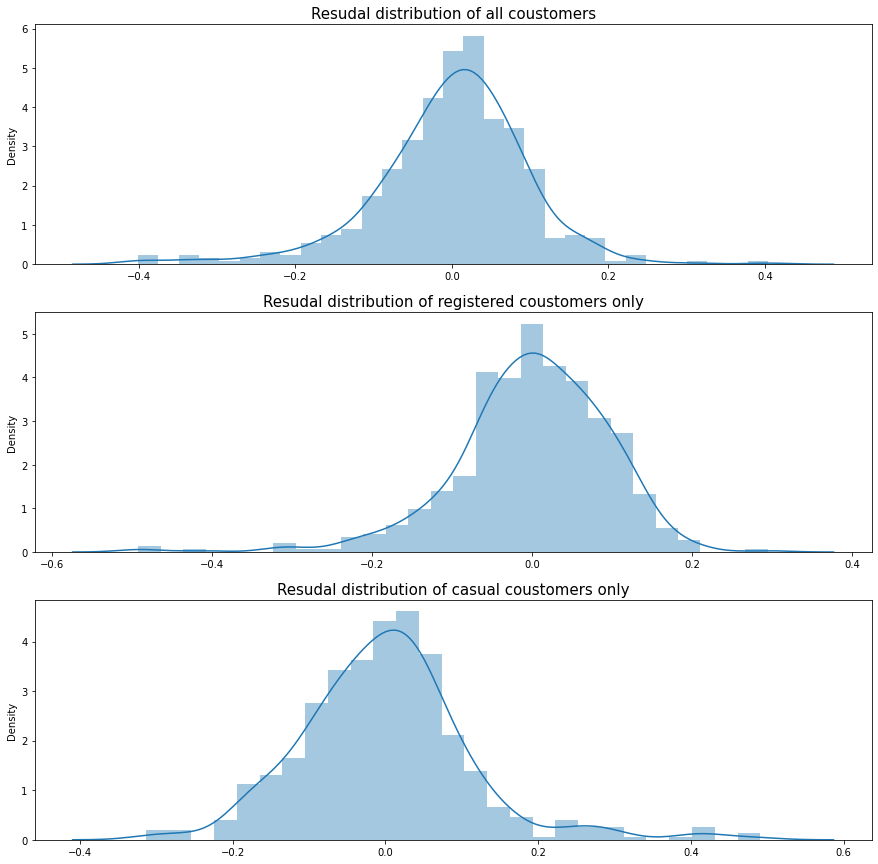

In [73]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
p = sns.distplot(resudal)
p = plt.title('Resudal distribution of all coustomers', fontsize = 15)

plt.subplot(3,1,2)
p = sns.distplot(resudal_reg)
p = plt.title('Resudal distribution of registered coustomers only', fontsize = 15)

plt.subplot(3,1,3)
p = sns.distplot(resudal_cas)
p = plt.title('Resudal distribution of casual coustomers only', fontsize = 15)

plt.savefig('img/Redual_analysus_plot.png')

plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> Resudal:
Resdual is following normal distribuation with mean zero, which is following linear regression assumption
</div>

### Check for Homoscedasticity

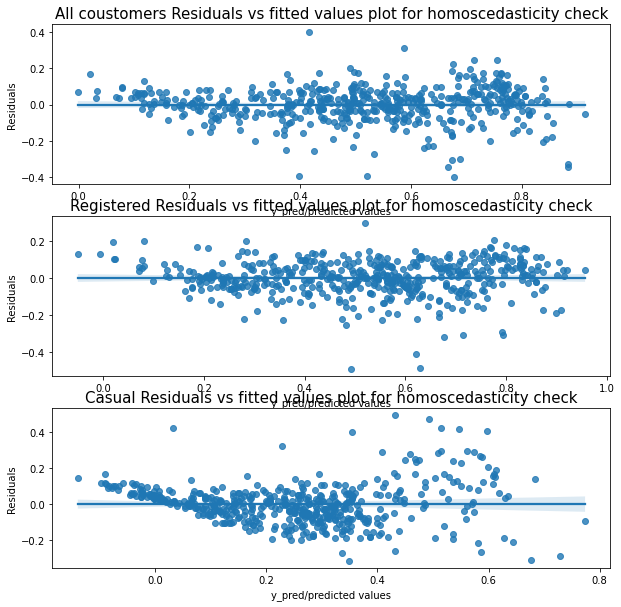

In [74]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
p = sns.regplot(ytrain_predict ,resudal)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('All coustomers Residuals vs fitted values plot for homoscedasticity check', fontsize = 15)

plt.subplot(3,1,2)
p = sns.regplot(ytrain_reg_predict ,resudal_reg)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Registered Residuals vs fitted values plot for homoscedasticity check', fontsize = 15)

plt.subplot(3,1,3)
p = sns.regplot(ytrain_cas_predict ,resudal_cas)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Casual Residuals vs fitted values plot for homoscedasticity check', fontsize = 15)

plt.savefig('img/Homoscedasticity_plot.png')

plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> Homoscedasticity:
Fitted line on resudals pass is almost flat with centered around 0, We can say resudal's have equal vareiance. Another assumption of linear regression is satisfied
</div>

## Step 5: Predection and evaluation on the test set

### Predction
For predictions we have to do same transform on test data with same scaler values used on training data

In [75]:
bs_test[num_var] = scaler.transform(bs_test[num_var])
bsreg_test[num_var_reg] = scaler_reg.transform(bsreg_test[num_var_reg])
bscas_test[num_var_cas] = scaler_cas.transform(bscas_test[num_var_cas])

In [76]:
bs_test.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.031818,0.686364,0.547928,0.645947,0.344202,0.524364,0.231818,0.268182,0.218182,0.031818,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.175916,0.465029,0.209670,0.144376,0.153659,0.214325,0.422956,0.444023,0.413953,0.175916,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.025950,0.261915,0.047441,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.376318,0.539394,0.232051,0.389180,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.569084,0.639545,0.330127,0.522319,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735475,0.745561,0.437846,0.676081,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.815378,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
bsreg_test.describe()

,holiday,workingday,atemp,hum,windspeed,registered,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.031818,0.686364,0.547928,0.645947,0.344202,0.527059,0.231818,0.268182,0.218182,0.031818,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.175916,0.465029,0.209670,0.144376,0.153659,0.213853,0.422956,0.444023,0.413953,0.175916,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.025950,0.261915,0.047441,0.059486,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.376318,0.539394,0.232051,0.391532,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.569084,0.639545,0.330127,0.521224,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735475,0.745561,0.437846,0.672683,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.815378,0.969679,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
bscas_test.describe()

,holiday,workingday,atemp,hum,windspeed,casual,season_spring,season_summer,season_winter,weathersit_LightSnow,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.031818,0.686364,0.547928,0.645947,0.344202,0.276551,0.231818,0.268182,0.218182,0.031818,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.175916,0.465029,0.209670,0.144376,0.153659,0.218481,0.422956,0.444023,0.413953,0.175916,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.025950,0.261915,0.047441,0.002133,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.376318,0.539394,0.232051,0.108427,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.569084,0.639545,0.330127,0.230570,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735475,0.745561,0.437846,0.364752,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.815378,1.038708,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
ytest = bs_test.pop('cnt')
Xtest = bs_test
Xtest_sm = sm.add_constant(Xtest)
Xtest_sm = Xtest_sm.drop(col_eliminated, axis=1)
Xtest_sm = Xtest_sm.drop(['mnth_January','mnth_November','weekday_Saturday','mnth_July','holiday','season_spring', 'hum'], axis = 1)
Xtest_sm.head()

,const,atemp,windspeed,season_summer,season_winter,weathersit_LightSnow,weathersit_MistCloudy,yr_2019,mnth_September
96,1.0,0.465495,0.288453,1,0,0,0,0,0
535,1.0,0.842587,0.188468,1,0,0,0,1,0
299,1.0,0.496145,0.361537,0,1,0,1,0,0
280,1.0,0.569910,0.047441,0,1,0,0,0,0
36,1.0,0.279068,0.246166,0,0,0,0,0,0


In [80]:
ytest_reg = bsreg_test.pop('registered')
Xtest_reg = bsreg_test
Xtest_reg_sm = sm.add_constant(Xtest_reg)
Xtest_reg_sm = Xtest_reg_sm.drop(col_reg_eliminated, axis=1)
Xtest_reg_sm = Xtest_reg_sm.drop(['mnth_January', 'weekday_Sunday', 'weekday_Wednesday', 'mnth_November', 'mnth_July', 'season_spring', 'hum'], axis = 1)
Xtest_reg_sm.head()

,const,workingday,atemp,windspeed,season_winter,weathersit_LightSnow,weathersit_MistCloudy,yr_2019,mnth_September
96,1.0,1,0.465495,0.288453,0,0,0,0,0
535,1.0,1,0.842587,0.188468,0,0,0,1,0
299,1.0,1,0.496145,0.361537,1,0,1,0,0
280,1.0,0,0.569910,0.047441,1,0,0,0,0
36,1.0,0,0.279068,0.246166,0,0,0,0,0


In [81]:
ytest_cas = bscas_test.pop('casual')
Xtest_cas = bscas_test
Xtest_cas_sm = sm.add_constant(Xtest_cas)
Xtest_cas_sm = Xtest_cas_sm.drop(col_cas_eliminated, axis=1)
Xtest_cas_sm = Xtest_cas_sm.drop(['weekday_Saturday', 'season_spring', 'weathersit_MistCloudy', 'weathersit_LightSnow', 'holiday', 'mnth_September', 'mnth_March'], axis = 1)
Xtest_cas_sm.head()

,const,workingday,atemp,hum,windspeed,season_summer,yr_2019,mnth_October,weekday_Sunday
96,1.0,1,0.465495,0.621297,0.288453,1,0,0,0
535,1.0,1,0.842587,0.610133,0.188468,1,1,0,0
299,1.0,1,0.496145,0.837699,0.361537,0,0,1,0
280,1.0,0,0.569910,0.722627,0.047441,0,0,0,0
36,1.0,0,0.279068,0.585659,0.246166,0,0,0,0


In [82]:
ytest_predict = lrm_model.predict(Xtest_sm)
ytest_reg_predict = lrm_reg_model.predict(Xtest_reg_sm)
ytest_cas_predict = lrm_cas_model.predict(Xtest_cas_sm)

### Evaluation

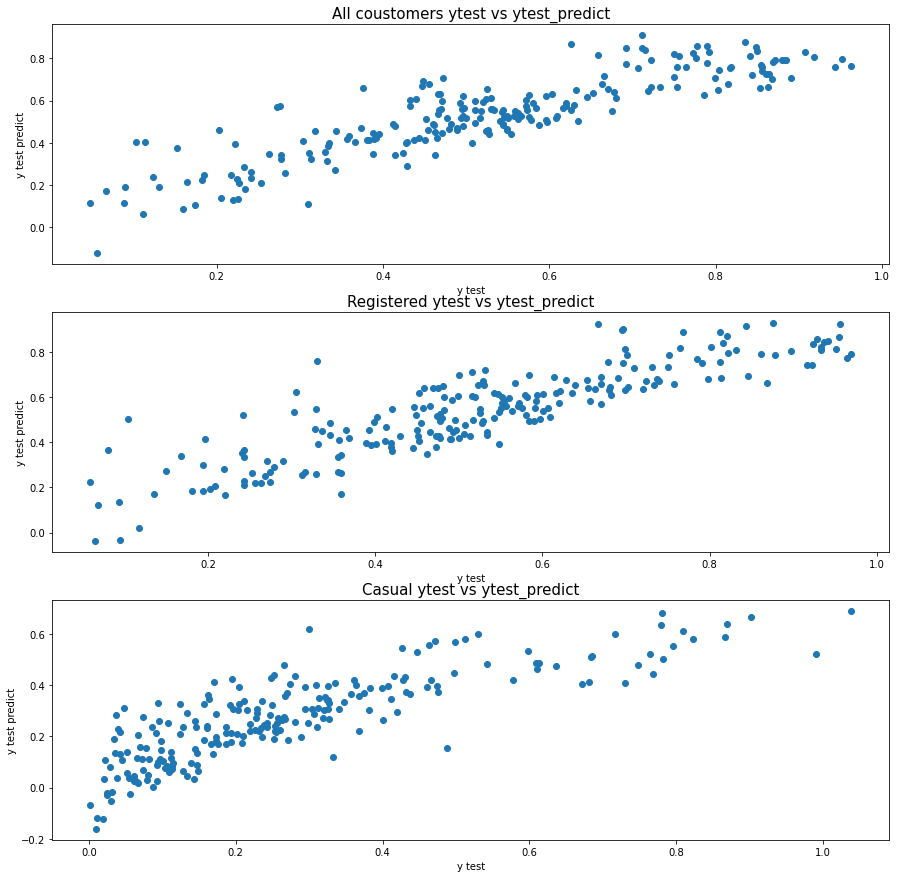

In [83]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.scatter(ytest, ytest_predict)
plt.xlabel("y test")
plt.ylabel("y test predict")
plt.title("All coustomers ytest vs ytest_predict", fontsize = 15)

plt.subplot(3,1,2)
plt.scatter(ytest_reg, ytest_reg_predict)
plt.xlabel("y test")
plt.ylabel("y test predict")
plt.title("Registered ytest vs ytest_predict", fontsize = 15)

plt.subplot(3,1,3)
plt.scatter(ytest_cas, ytest_cas_predict)
plt.xlabel("y test")
plt.ylabel("y test predict")
plt.title("Casual ytest vs ytest_predict", fontsize = 15)

plt.show()

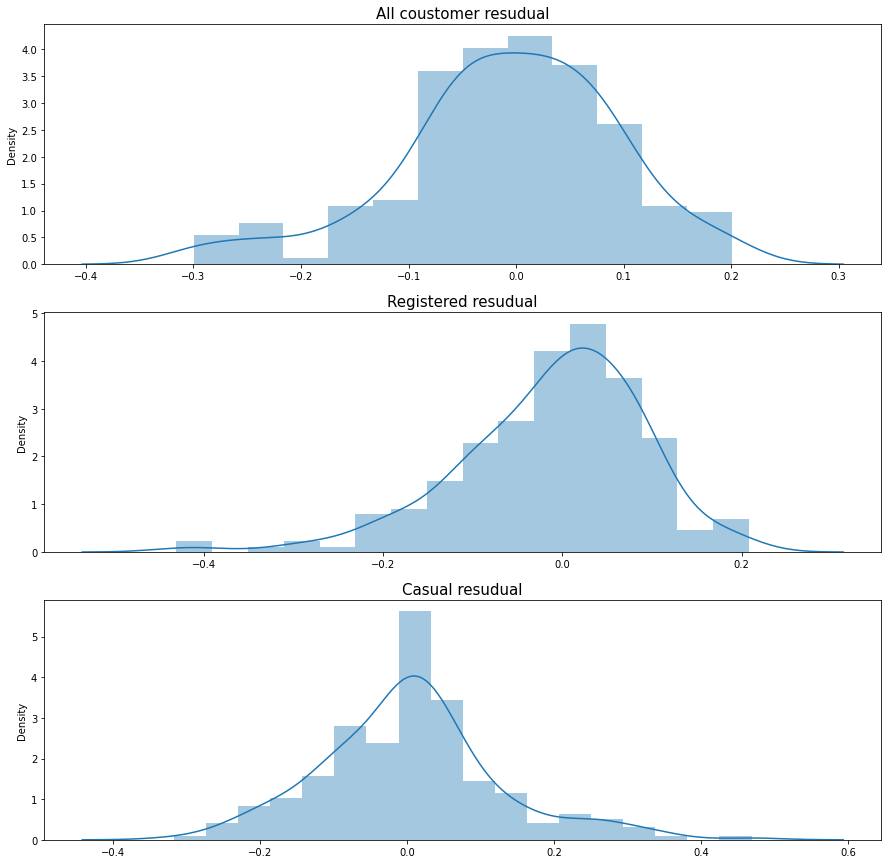

In [84]:
resudal_test = ytest -  ytest_predict
resudal_reg_test = ytest_reg -  ytest_reg_predict
resudal_cas_test = ytest_cas -  ytest_cas_predict

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.distplot(resudal_test)
plt.title("All coustomer resudual", fontsize = 15)

plt.subplot(3,1,2)
sns.distplot(resudal_reg_test)
plt.title("Registered resudual", fontsize = 15)

plt.subplot(3,1,3)
sns.distplot(resudal_cas_test)
plt.title("Casual resudual", fontsize = 15)

plt.show()

In [85]:
resdual_all_test = pd.DataFrame(resudal.describe().apply(lambda x: f"{x:0.3f}")).rename(columns={0: "All coustomer"}).rename_axis("Stat")
resdual_reg_test = pd.DataFrame(resudal_reg.describe().apply(lambda x: f"{x:0.3f}")).rename(columns={0: "Registered"}).rename_axis("Stat")
resdual_cas_test = pd.DataFrame(resudal_cas.describe().apply(lambda x: f"{x:0.3f}")).rename(columns={0: "Casual"}).rename_axis("Stat")
resdual_stat =  resdual_all_test.merge(resdual_reg_test, on="Stat" ,how="inner")
resdual_stat =  resdual_stat.merge(resdual_cas_test, on="Stat" ,how="inner")
display(resdual_stat)

,All coustomer,Registered,Casual
Stat,,,
count,510.000,510.000,510.000
mean,-0.000,-0.000,-0.000
std,0.097,0.095,0.111
min,-0.401,-0.492,-0.313
25%,-0.046,-0.050,-0.066
50%,0.008,0.004,-0.001
75%,0.058,0.063,0.054
max,0.404,0.295,0.491


<div class="alert alert-block alert-success">
<b>Observation:</b> Resudual analysis for train and test data follow nominal distribution with mean 0 and same standard deviation
</div>

In [86]:
from sklearn.metrics import r2_score

r2_test = r2_score(ytest, ytest_predict)
r2_train = r2_score(ytrain, ytrain_predict)

r2_test_reg = r2_score(ytest_reg, ytest_reg_predict)
r2_train_reg = r2_score(ytrain_reg, ytrain_reg_predict)

r2_test_cas = r2_score(ytest_cas, ytest_cas_predict)
r2_train_cas = r2_score(ytrain_cas, ytrain_cas_predict)

r2_data = {'Customer type':['All customers', 'Registered', 'Casual'],
        'R2 train data':[r2_train, r2_train_reg, r2_train_cas],
        'R2 test data':[r2_test, r2_test_reg, r2_test_cas]
       }

In [87]:
r2_data_df = pd.DataFrame(r2_data)
dfi.export(r2_data_df,"img/R2_compare.png")
display(r2_data_df)

[0413/020656.475980:INFO:headless_shell.cc(659)] Written to file /var/folders/7v/k8c1f2wn5nv_9c15ft5q88gm0000gp/T/tmpeurkfds0/temp.png.


,Customer type,R2 train data,R2 test data
0,All customers,0.816605,0.773717
1,Registered,0.829568,0.764625
2,Casual,0.705143,0.687274


$$
cnt = 0.1188 + 0.6041 * atemp + (-0.2552) * weathersitLightSnow + 0.2330 * yr2019+ (-0.1517) * windspeed + 0.1198 * seasonWinter + 0.0765 * seasonSummer + (-0.0743) * weathersitMistCloudy + 0.0730 * mnthSeptember
$$

$$
register = 0.0596 + 0.5404 * atemp  + (-0.2624) * weathersitLightSnow  + 0.2531 * yr2019 + 0.1409 * workingday  + 0.1242 * seasonWinter + (-0.1141) * windspeed + (-0.0665) * weathersitMistCloudy + 0.0643 * mnthSeptember
$$

$$
casual = 0.2730 + 0.5146 * atemp + (-0.2345) * workingday  + (-0.2020) * hum + (-0.1855) * windspeed + 0.0826 * seasonSummer + 0.0812 * yr2019 + 0.0554 * mnthOctober + 0.0414 * weekdaySunday
$$